In [1]:
import numpy as np # linear algebra
import numpy.linalg as ln
import pandas as pd # data processing
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import random
import statistics

# Importing the Datasets CSV

dataset_customers = "C:/Users/Alessia/Documents/GitHub/H-M-Customer-Segmentation-CRISP-DM/Dataset/customers.csv"
dataset_articles = "C:/Users/Alessia/Documents/GitHub/H-M-Customer-Segmentation-CRISP-DM/Dataset/articles.csv"
dataset_transactions = "C:/Users/Alessia/Documents/GitHub/H-M-Customer-Segmentation-CRISP-DM/Dataset/transactions_train.csv"

# Read Datasets
customers = pd.read_csv(dataset_customers)

articles = pd.read_csv(dataset_articles)

transactions = pd.read_csv(dataset_transactions)

print("loading finished")

loading finished


In [2]:
# Import CPT
import os
import sys
sys.path.insert(0, os.path.abspath('C:/Users/Alessia/Documents/CPT-master/CPT-master/modules'))
import CPT
import PredictionTree
from CPT import *

In [3]:
# Instantiate CPT model
# model = CPT()
# data,target = model.load_files("C:/Users/Alessia/Documents/GitHub/H-M-Sales-CRISP-DM-Analysis/trainprova.csv","C:/Users/Alessia/Documents/GitHub/H-M-Sales-CRISP-DM-Analysis/testprova.csv")
# print(data)
# model.train(data)

In [4]:
# Predictions using CPT, using the last 5 data in each sequence, and I should predict the next 3 items

# predictions = model.predict(data,target,5,3)
# print(predictions)

In [5]:
#### EXPLORATORY ANALYSIS

# Number of features and rows in Customers 
c_rows = customers.shape[0]
c_features = customers.shape[1]
print (c_rows, c_features)

# Number of features and rows in Articles
a_rows = articles.shape[0]
a_features = articles.shape[1]
print (a_rows, a_features)

# Number of features and rows in Transactions
t_rows = transactions.shape[0]
t_features = transactions.shape[1] 
print(t_rows, t_features)


1371980 7
105542 25
31788324 5


In [6]:
# Getting knowledge about updatedness of data
print(transactions.iloc[1]['t_dat'], transactions.iloc[-1]['t_dat'])

2018-09-20 2020-09-22


In [7]:
# Exploring the features of each dataset
print("Customers features: " + str(c_features))
print(customers.dtypes)
print("###########################")
print("Articles features: " + str(a_features))
print(articles.dtypes)
print("###########################")
print("Transactions features: " + str(t_features))
print(transactions.dtypes)


Customers features: 7
customer_id                object
FN                        float64
Active                    float64
club_member_status         object
fashion_news_frequency     object
age                       float64
postal_code                object
dtype: object
###########################
Articles features: 25
article_id                       int64
product_code                     int64
prod_name                       object
product_type_no                  int64
product_type_name               object
product_group_name              object
graphical_appearance_no          int64
graphical_appearance_name       object
colour_group_code                int64
colour_group_name               object
perceived_colour_value_id        int64
perceived_colour_value_name     object
perceived_colour_master_id       int64
perceived_colour_master_name    object
department_no                    int64
department_name                 object
index_code                      object
index_name   

In [8]:
# How many different customers postal codes do we have?
print(len(customers['postal_code'].unique()))

352899


In [9]:
# Check if there are customer rows where some features are null
print(customers.isna().sum())

# Drop all columns where age is NaN
customers = customers[customers["age"].notna()]

# Fill the NaN values in Active
customers['Active'] = customers['Active'].fillna(0)

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64


In [10]:
# Replace all the occurrences of NONE with None

customers['fashion_news_frequency'] = customers['fashion_news_frequency'].replace(['NONE'],'None')

In [11]:
# Drop all columns where "club_member_status" and "fashion_news_frequency" are NaN
customers = customers[customers["club_member_status"].notna()]
customers = customers[customers["fashion_news_frequency"].notna()]

In [12]:
# Extract non null values from "club_member_status" column and use them to fill the NaN values of the same column

# values = customers['club_member_status'].value_counts(dropna=True)

# a_v = customers[customers['club_member_status'].notna()]
# active_values=a_v['club_member_status'].unique()
# customers['club_member_status'] = customers['club_member_status'].fillna(np.random.choice(active_values.tolist()))
# print(customers['club_member_status'].unique())

Che cosa sto facendo sostanzialmente?
Ho visto che per gli attributi "fashion_news_frequency" e "club_member_status" i valori nulli erano pochi rispetto alle totali istanze del dataset, per questo decido di dropparle dal dataset. Per quanto riguarda invece l'attributo FN, le istanze con i valori nulli sono molte rispetto al totale, quindi non posso rimuovere tutte quelle che non possiedono un valore per FN. Per questo motivo decido di non prendere in considerazione questa feature per la mia analisi.

In [13]:
# Replace NaN with 0 
customers['FN'] = customers['FN'].fillna(0)

In [14]:
# Check the possible values for each of the following attributes
print(customers['Active'].unique(), customers['club_member_status'].unique(),customers['fashion_news_frequency'].unique(),customers['FN'].unique())

[0. 1.] ['ACTIVE' 'PRE-CREATE' 'LEFT CLUB'] ['None' 'Regularly' 'Monthly'] [0. 1.]


In [15]:
# At this point i have 1338570 homogeneous records for Customers
print(customers.notna().sum())

customer_id               1338570
FN                        1338570
Active                    1338570
club_member_status        1338570
fashion_news_frequency    1338570
age                       1338570
postal_code               1338570
dtype: int64


In [16]:
# Check the transactions
print(transactions.isna().sum())

# The records for the transactions are all consistent

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64


In [17]:
# I split the customers
customers_1 = customers[customers['customer_id'] < '669286']
customers_2 = customers[customers['customer_id'] >= '669286']

In [18]:
# Merging customers and transactions
customers_transactions_1 = pd.merge(customers_1, transactions, on='customer_id')
customers_transactions_2 = pd.merge(customers_2, transactions, on='customer_id')

In [19]:
customers_transactions = customers_transactions_1.append(customers_transactions_2)

In [20]:
# Print unique values of customer_id in the whole dataframe customers_transactions
print(len(customers_transactions["customer_id"].unique()))

# Double check of the number of customers without any transaction. There are 9583 customers without any transaction
special_customers = customers[~customers["customer_id"].astype(str).isin(customers_transactions["customer_id"].astype(str).unique())]
print(len(special_customers))

1328987
9583


In [21]:
# Split transactions dataframe because it's too large
#trans_2018 = transactions[transactions['t_dat'] < "2019-01-01"]
#trans_2019 = transactions[(transactions['t_dat'] < "2020-01-01") & (transactions['t_dat'] >= "2019-01-01")]
#trans_2020 = transactions[transactions['t_dat'] >= "2020-01-01"]

#print(len(trans_2018),len(trans_2019),len(trans_2020))

# Check if the split was successful
#print(trans_2018.iloc[1]['t_dat'], trans_2018.iloc[-1]['t_dat'])
#print(trans_2019.iloc[1]['t_dat'], trans_2019.iloc[-1]['t_dat'])
#print(trans_2020.iloc[1]['t_dat'], trans_2020.iloc[-1]['t_dat'])

# Merge dataframes Customers and Transactions
# customers_transactions_2018 = pd.merge(customers, trans_2018, on='customer_id')

# customers_transactions_2019 = pd.merge(customers_transactions_2018, trans_2019, on='customer_id')
# print(customers_transactions_2019.head())

In [22]:
print(customers_transactions["sales_channel_id"].unique())

[1 2]


In [23]:
# Finding number of articles purchased by each Customer in 2018
df_2018 = customers_transactions.query('t_dat < "2019-01-01"')

# Filter out labels of interest
df_2018 = df_2018.filter(['customer_id', 'article_id'])
df_2018.rename(columns = {'article_id':'tot_articles_2018'}, inplace = True)

In [24]:
# Finding number of articles purchased by each Customer in 2019
df_2019 = customers_transactions.query('t_dat < "2020-01-01" & t_dat>="2019-01-01"')
 
# Filter out labels of interest
df_2019 = df_2019.filter(['customer_id', 'article_id'])
df_2019.rename(columns = {'article_id':'tot_articles_2019'}, inplace = True)

In [25]:
# Finding number of articles purchased by each Customer in 2020
df_2020 = customers_transactions.query('t_dat >= "2020-01-01"')
 
# Filter out labels of interest
df_2020 = df_2020.filter(['customer_id', 'article_id'])
df_2020.rename(columns = {'article_id':'tot_articles_2020'}, inplace = True)

In [26]:
# Merge these new features into Customers dataset
customers = pd.merge(customers,df_2018.groupby('customer_id').count(), on='customer_id')
customers = pd.merge(customers,df_2019.groupby('customer_id').count(), on='customer_id')
customers = pd.merge(customers,df_2020.groupby('customer_id').count(), on='customer_id')

In [27]:
# NEW ######
# Merge with unique articles

"""
print(customers.head())

df_2018_unique = df_2018.filter(['customer_id', 'tot_articles_2018'])
df_2018_unique = df_2018_unique.groupby('customer_id').apply(lambda x: x.tot_articles_2018.nunique())

df_2019_unique = df_2019.filter(['customer_id', 'tot_articles_2019'])
df_2019_unique = df_2019_unique.groupby('customer_id').apply(lambda x: x.tot_articles_2019.nunique())

df_2020_unique = df_2020.filter(['customer_id', 'tot_articles_2020'])
df_2020_unique = df_2020_unique.groupby('customer_id').apply(lambda x: x.tot_articles_2020.nunique())    


customers = pd.merge(customers,df_2018_unique, on='customer_id', how='left')
customers = pd.merge(customers,df_2019_unique, on='customer_id', how='left')
customers = pd.merge(customers,df_2020_unique, on='customer_id',how='left') 


#customers.rename(columns = {'tot_articles_2018_x':'unique_articles_2018'}, inplace = True)
#customers.rename(columns = {'tot_articles_2019_x':'unique_articles_2019'}, inplace = True)
#customers.rename(columns = {'tot_articles_2020_x':'unique_articles_2020'}, inplace = True)"""

"\nprint(customers.head())\n\ndf_2018_unique = df_2018.filter(['customer_id', 'tot_articles_2018'])\ndf_2018_unique = df_2018_unique.groupby('customer_id').apply(lambda x: x.tot_articles_2018.nunique())\n\ndf_2019_unique = df_2019.filter(['customer_id', 'tot_articles_2019'])\ndf_2019_unique = df_2019_unique.groupby('customer_id').apply(lambda x: x.tot_articles_2019.nunique())\n\ndf_2020_unique = df_2020.filter(['customer_id', 'tot_articles_2020'])\ndf_2020_unique = df_2020_unique.groupby('customer_id').apply(lambda x: x.tot_articles_2020.nunique())    \n\n\ncustomers = pd.merge(customers,df_2018_unique, on='customer_id', how='left')\ncustomers = pd.merge(customers,df_2019_unique, on='customer_id', how='left')\ncustomers = pd.merge(customers,df_2020_unique, on='customer_id',how='left') \n\n\n#customers.rename(columns = {'tot_articles_2018_x':'unique_articles_2018'}, inplace = True)\n#customers.rename(columns = {'tot_articles_2019_x':'unique_articles_2019'}, inplace = True)\n#customers.r

In [28]:
# Merge average articles 2018,2019,2020
customers = pd.merge(customers,df_2018.groupby('customer_id').count()/3, on='customer_id')
customers = pd.merge(customers,df_2019.groupby('customer_id').count()/12, on='customer_id')
customers = pd.merge(customers,df_2020.groupby('customer_id').count()/9, on='customer_id')

# rename

# Rename
customers.rename(columns = {'tot_articles_2018_x':'tot_articles_2018'}, inplace = True)
customers.rename(columns = {'tot_articles_2019_x':'tot_articles_2019'}, inplace = True)
customers.rename(columns = {'tot_articles_2020_x':'tot_articles_2020'}, inplace = True)
customers.rename(columns = {'tot_articles_2018_y':'avg_articles_2018'}, inplace = True)
customers.rename(columns = {'tot_articles_2019_y':'avg_articles_2019'}, inplace = True)
customers.rename(columns = {'tot_articles_2020_y':'avg_articles_2020'}, inplace = True)


In [29]:
print(customers.head())
print(customers.shape)

                                         customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  0.0     0.0   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  0.0     0.0   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  0.0     0.0   
3  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   
4  00007d2de826758b65a93dd24ce629ed66842531df6699...  1.0     1.0   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   None  49.0   
1             ACTIVE                   None  25.0   
2             ACTIVE                   None  24.0   
3             ACTIVE              Regularly  52.0   
4             ACTIVE              Regularly  32.0   

                                         postal_code  tot_articles_2018  \
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...                  3   
1  2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...                  8   
2  64f17e6a330a85798e4998f62d0930d14db8db

In [30]:
# Find the number of transactions of type 1 for each customer
trans_type1 = customers_transactions.query('sales_channel_id == 1')
trans_type1 = trans_type1.filter(['customer_id', 'sales_channel_id'])
trans_type1.rename(columns = {'sales_channel_id':'sales_channel_1'}, inplace = True)
print(trans_type1.groupby('customer_id').count())

                                                    sales_channel_1
customer_id                                                        
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d...                9
0000423b00ade91418cceaf3b26c6af3dd342b51fd051ee...                5
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe...                2
00007d2de826758b65a93dd24ce629ed66842531df66993...                3
00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef773...                2
...                                                             ...
ffffaff3905b803d1c7e153a1378a5151e1f34f236ba545...                1
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747...               13
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53...               28
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a17...               11
ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b...                1

[725896 rows x 1 columns]


In [31]:
# Find the number of transactions of type 2 for each customer
trans_type2 = customers_transactions.query('sales_channel_id == 2')
trans_type2 = trans_type2.filter(['customer_id', 'sales_channel_id'])
trans_type2.rename(columns = {'sales_channel_id':'sales_channel_2'}, inplace = True)
print(trans_type2.groupby('customer_id').count())

                                                    sales_channel_2
customer_id                                                        
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d...               12
0000423b00ade91418cceaf3b26c6af3dd342b51fd051ee...               81
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad...               18
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c...                2
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe...               11
...                                                             ...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747...               38
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53...               56
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a17...               34
ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b...                6
ffffd9ac14e89946416d80e791d064701994755c3ab686a...                1

[1082586 rows x 1 columns]


In [32]:
# Merge these new features into customers table

customers = pd.merge(customers, trans_type1.groupby('customer_id').count(), on='customer_id')
print(customers.shape)
customers = pd.merge(customers,trans_type2.groupby('customer_id').count(), on='customer_id')
print(customers.shape)

(283295, 14)
(256139, 15)


In [33]:
print(customers.head())

                                         customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  0.0     0.0   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  0.0     0.0   
2  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   
3  00007d2de826758b65a93dd24ce629ed66842531df6699...  1.0     1.0   
4  00009d946eec3ea54add5ba56d5210ea898def4b46c685...  1.0     1.0   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   None  49.0   
1             ACTIVE                   None  25.0   
2             ACTIVE              Regularly  52.0   
3             ACTIVE              Regularly  32.0   
4             ACTIVE              Regularly  56.0   

                                         postal_code  tot_articles_2018  \
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...                  3   
1  2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...                  8   
2  25fa5ddee9aac01b35208d01736e57942317d7

In [34]:
# Merging Customers with Articles 
# customers_articles = pd.merge(pd.read_csv(dataset_customers), pd.read_csv(dataset_articles), on ='customer_id')
print(customers_transactions.head())

                                         customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  0.0     0.0   
1  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  0.0     0.0   
2  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  0.0     0.0   
3  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  0.0     0.0   
4  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  0.0     0.0   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   None  49.0   
1             ACTIVE                   None  49.0   
2             ACTIVE                   None  49.0   
3             ACTIVE                   None  49.0   
4             ACTIVE                   None  49.0   

                                         postal_code       t_dat  article_id  \
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  2018-12-27   625548001   
1  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  2018-12-27   176209023   
2  52043ee2162cf5aa7ee7997

In [35]:
# Need to check some variables about the price column

# Mean of the data

# mean = statistics.fmean(transactions["price"])
# print(mean)


In [36]:
# Square deviations

# stdev = statistics.stdev(transactions["price"])
# print(stdev)

In [37]:
# Variance
# variance = statistics.variance(transactions["price"])
# print(variance)

In [38]:
# Norm
# norm = ln.norm(transactions["price"])
#print(norm)

# Mean 0.027829273856993762
# Std-deviation 0.019181128054793647
# Variance 0.00036791567345439193
# Norm 190.56357821702613

In [39]:
# I have checked that my values are standardized, but the values are not satisfactory.
# So I decide to scale my values multiplying them for 10^3 in order to make them prices that are more realistic.
# I have that my lowest value is 0.01 and my biggest is 591.52
#transactions["price"] = transactions["price"] * (pow(10,3)) 


# Print the new min and max values, and the rows where they appear.
print(transactions["price"].max(), transactions["price"].idxmax(),  transactions["price"].min(),transactions["price"].idxmin())

0.5915254237288136 69300 1.6949152542372878e-05 17329349


In [40]:
##### Pick the important columns from transactions and then merge them with customers table
am_2018 = transactions.query('t_dat < "2019-01-01"')

#Filter out labels of interest
am_2018 = am_2018.filter(['customer_id', 'price'])
am_2018.rename(columns = {'price':'tot_amount_2018'}, inplace = True)

In [41]:
##### Pick the important columns from transactions and then merge them with customers table
am_2019 = transactions.query('t_dat < "2020-01-01" & t_dat>="2019-01-01"')

#Filter out labels of interest
am_2019 = am_2019.filter(['customer_id', 'price'])
am_2019.rename(columns = {'price':'tot_amount_2019'}, inplace = True)

In [42]:
##### Pick the important columns from transactions and then merge them with customers table
am_2020 = transactions.query('t_dat >= "2020-01-01"')

#Filter out labels of interest
am_2020 = am_2020.filter(['customer_id', 'price'])
am_2020.rename(columns = {'price':'tot_amount_2020'}, inplace = True)

In [43]:
# Merge these new tot_amount features into customers table
customers = pd.merge(customers, am_2018.groupby('customer_id').sum(), on='customer_id')
customers = pd.merge(customers, am_2019.groupby('customer_id').sum(), on='customer_id')
customers = pd.merge(customers, am_2020.groupby('customer_id').sum(), on='customer_id')

In [44]:
# Merge these new avg amounts features into customers table
customers = pd.merge(customers, am_2018.groupby('customer_id').sum()/3, on='customer_id')
customers = pd.merge(customers, am_2019.groupby('customer_id').sum()/12, on='customer_id')
customers = pd.merge(customers, am_2020.groupby('customer_id').sum()/9, on='customer_id')

In [45]:
# Rename columns in customers
customers.rename(columns = {'tot_amount_2018_y':'avg_amount_2018'}, inplace = True)
customers.rename(columns = {'tot_amount_2019_y':'avg_amount_2019'}, inplace = True)
customers.rename(columns = {'tot_amount_2020_y':'avg_amount_2020'}, inplace = True)
customers.rename(columns = {'tot_amount_2018_x':'tot_amount_2018'}, inplace = True)
customers.rename(columns = {'tot_amount_2019_x':'tot_amount_2019'}, inplace = True)
customers.rename(columns = {'tot_amount_2020_x':'tot_amount_2020'}, inplace = True)
print(customers.head())

                                         customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  0.0     0.0   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  0.0     0.0   
2  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   
3  00007d2de826758b65a93dd24ce629ed66842531df6699...  1.0     1.0   
4  00009d946eec3ea54add5ba56d5210ea898def4b46c685...  1.0     1.0   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   None  49.0   
1             ACTIVE                   None  25.0   
2             ACTIVE              Regularly  52.0   
3             ACTIVE              Regularly  32.0   
4             ACTIVE              Regularly  56.0   

                                         postal_code  tot_articles_2018  \
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...                  3   
1  2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...                  8   
2  25fa5ddee9aac01b35208d01736e57942317d7

In [46]:
# Infer sex of the customers thanks to the purchased articles

# Analyze possible categories
print(articles["index_group_name"].unique())
print(articles["index_group_no"].unique())

['Ladieswear' 'Baby/Children' 'Menswear' 'Sport' 'Divided']
[ 1  4  3 26  2]


In [47]:
# We find how many articles we have divided for categories
sex_category = articles[["index_group_no", "index_group_name"]].reset_index()
display(sex_category["index_group_name"].value_counts())

Ladieswear       39737
Baby/Children    34711
Divided          15149
Menswear         12553
Sport             3392
Name: index_group_name, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

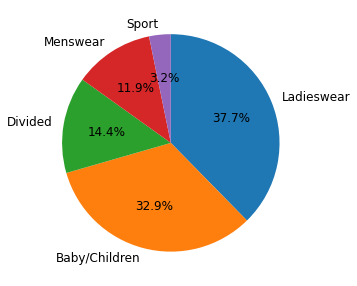

In [48]:
# We find the list of categories of articles and we plot the percentages of articles categories
sex_category_list = sex_category["index_group_name"].value_counts().index.to_list()
plt.figure(figsize=(5, 5))
plt.rcParams["font.size"] = 12
plt.pie(sex_category["index_group_name"].value_counts().sort_values(ascending=False), 
        labels = sex_category_list, startangle = 90, counterclock=False, autopct="%1.1f%%")
plt.show

In [49]:
# I rename the index group as sex attribute
articles_category_df = pd.DataFrame(articles[["article_id", "index_group_no"]])
articles_category_df.columns = ["article_id", "sex_attribute"]
articles_category_df

,article_id,sex_attribute
0,108775015,1
1,108775044,1
2,108775051,1
3,110065001,1
4,110065002,1
...,...,...
105537,953450001,3
105538,953763001,1
105539,956217002,1
105540,957375001,2


In [50]:
# I merge these sex attributes with the dataframe customers_transactions
customers_transactions = pd.merge(customers_transactions, articles_category_df, on = "article_id", how = "left")

In [51]:
cust_sex = customers_transactions[["customer_id", "sex_attribute", "article_id"]].groupby(["customer_id","sex_attribute"]).count().unstack()
cust_sex.columns = ["Woman", "Young", "Man", "Have-kids", "Sports-person"]

In [52]:
# Fill NaN values
cust_sex = cust_sex.fillna(0)

In [53]:
# Merge these attributes into the customers dataset 
customers = pd.merge(customers, cust_sex, on ='customer_id')
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,tot_articles_2018,tot_articles_2019,tot_articles_2020,...,tot_amount_2019,tot_amount_2020,avg_amount_2018,avg_amount_2019,avg_amount_2020,Woman,Young,Man,Have-kids,Sports-person
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,None,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,3,12,6,...,0.394390,0.144475,0.036706,0.032866,0.016053,13.0,2.0,1.0,5.0,0.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,None,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,8,44,34,...,1.473831,0.836712,0.097130,0.122819,0.092968,62.0,19.0,0.0,4.0,1.0
2,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,2,4,7,...,0.146119,0.255814,0.022588,0.012177,0.028424,11.0,0.0,0.0,0.0,2.0
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...,32,78,10,...,3.077203,0.174746,0.190554,0.256434,0.019416,84.0,34.0,0.0,0.0,2.0
4,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,1.0,1.0,ACTIVE,Regularly,56.0,b31984b20a8c478de38eaf113c581ff64e63c4242e607b...,28,62,72,...,1.962356,2.113136,0.310695,0.163530,0.234793,79.0,28.0,52.0,0.0,3.0


In [54]:
print(customers.shape)

(256139, 26)


In [55]:
# Analysis on the age ranges
print(customers["age"].min(),customers["age"].max())

16.0 98.0


In [56]:
# NON FUNZIONA

#customers.loc[customers['age'] >= 16 & customers['age'] < 36,customers['age']] = "young adult"
#customers['age'] = customers['age'].astype(str)
#print(customers.dtypes)
#customers['age'] = customers['age'].mask(customers['age'] >= 66, "senior", inplace=True)
#customers['age'] = customers['age'].mask((customers['age'] >= 16) & (customers['age'] < 36), "young adult", inplace=True)
#customers['age'] = customers['age'].mask((customers['age'] >= 36) & (customers['age'] < 51), "adult", inplace=True)
#customers['age'] = customers['age'].mask((customers['age'] >= 51) & (customers['age'] < 66), "mid age adult", inplace=True)
#print(customers.head())

In [57]:
# Replace continuous ages with discrete ages groups
#ages_group = customers.query('age >= 16 & age < 36')
#ages_group = ages_group.filter(['customer_id', 'age'])
#ages_group.loc[(ages_group['age']>= 16) & (ages_group['age'] < 36) , 'age'] = 'young adult'

#ages_group = customers.query('age >= 36 & age < 51')
#ages_group = ages_group.filter(['customer_id', 'age'])
#ages_group.loc[(ages_group['age']>= 36) & (ages_group['age'] < 51) , 'age'] = 'adult'

#ages_group = customers.query('age >= 51 & age < 66')
#ages_group = ages_group.filter(['customer_id', 'age'])
#ages_group.loc[(ages_group['age']>= 51) & (ages_group['age'] < 66) , 'age'] = 'mid aged adult'

#ages_group = customers.query('age >= 65')
#ages_group = ages_group.filter(['customer_id', 'age'])
#ages_group.loc[ages_group['age']>= 65 , 'age'] = 'senior'

In [58]:
# Check ages before the transformation
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,tot_articles_2018,tot_articles_2019,tot_articles_2020,...,tot_amount_2019,tot_amount_2020,avg_amount_2018,avg_amount_2019,avg_amount_2020,Woman,Young,Man,Have-kids,Sports-person
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,None,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,3,12,6,...,0.394390,0.144475,0.036706,0.032866,0.016053,13.0,2.0,1.0,5.0,0.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,None,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,8,44,34,...,1.473831,0.836712,0.097130,0.122819,0.092968,62.0,19.0,0.0,4.0,1.0
2,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,2,4,7,...,0.146119,0.255814,0.022588,0.012177,0.028424,11.0,0.0,0.0,0.0,2.0
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...,32,78,10,...,3.077203,0.174746,0.190554,0.256434,0.019416,84.0,34.0,0.0,0.0,2.0
4,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,1.0,1.0,ACTIVE,Regularly,56.0,b31984b20a8c478de38eaf113c581ff64e63c4242e607b...,28,62,72,...,1.962356,2.113136,0.310695,0.163530,0.234793,79.0,28.0,52.0,0.0,3.0


In [59]:
# I assign a numeric category for each age range

#customers.loc[(customers['age']>= 16) & (customers['age']< 36) , 'age'] = 1
#customers.loc[(customers['age'] >= 36) & (customers['age'] < 51), 'age'] = 2
#customers.loc[(customers['age'] >= 51) & (customers['age'] < 66) , 'age'] = 3
#customers.loc[customers['age']>= 66, 'age'] = 4 

In [60]:
# Check numeric categories
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,tot_articles_2018,tot_articles_2019,tot_articles_2020,...,tot_amount_2019,tot_amount_2020,avg_amount_2018,avg_amount_2019,avg_amount_2020,Woman,Young,Man,Have-kids,Sports-person
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,None,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,3,12,6,...,0.394390,0.144475,0.036706,0.032866,0.016053,13.0,2.0,1.0,5.0,0.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,None,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,8,44,34,...,1.473831,0.836712,0.097130,0.122819,0.092968,62.0,19.0,0.0,4.0,1.0
2,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,2,4,7,...,0.146119,0.255814,0.022588,0.012177,0.028424,11.0,0.0,0.0,0.0,2.0
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...,32,78,10,...,3.077203,0.174746,0.190554,0.256434,0.019416,84.0,34.0,0.0,0.0,2.0
4,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,1.0,1.0,ACTIVE,Regularly,56.0,b31984b20a8c478de38eaf113c581ff64e63c4242e607b...,28,62,72,...,1.962356,2.113136,0.310695,0.163530,0.234793,79.0,28.0,52.0,0.0,3.0


In [61]:
# I replace numeric categories with categorical attributes
#customers['age'].replace({'young adult':1 },inplace=True)
#customers['age'].replace({'adult': 2},inplace=True)
#customers['age'].replace({'mid aged adult': 3},inplace=True)
#customers['age'].replace({'senior':4 },inplace=True)

In [62]:
# Drop postal code 

# I drop postal code because it doesn't tell us anything about the behaviour of the customer in the field of shopping. It's just a string
customers= customers.drop('postal_code',1)

In [63]:
# Need to find the garment and the color more purchased for each year
transac_drop_df = pd.DataFrame(transactions[['customer_id', 'article_id', 't_dat']]).reset_index()
articles_drop_df = pd.DataFrame(articles[['article_id', 'colour_group_code', 'garment_group_no',"perceived_colour_master_id", 'section_no']])

In [64]:
articles_transactions =  pd.merge(transac_drop_df, articles_drop_df, on='article_id', how="left")
print(articles_transactions.head())

   index                                        customer_id  article_id  \
0      0  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   
1      1  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023   
2      2  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221004   
3      3  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687003   
4      4  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687004   

        t_dat  colour_group_code  garment_group_no  \
0  2018-09-20                  9              1017   
1  2018-09-20                 51              1017   
2  2018-09-20                 52              1003   
3  2018-09-20                 52              1023   
4  2018-09-20                 93              1023   

   perceived_colour_master_id  section_no  
0                           5          61  
1                           4          61  
2                           4          58  
3                           4          15  
4   

In [65]:
# Get number of articles for each customer that are purchased more than one time
"""customers['count_purchased_more_than_one']=''
#df=customers_transactions.filter(['customer_id', 'article_id'])
df = customers_transactions[customers_transactions.groupby(['customer_id','article_id'])['article_id'].transform('size').lt(2)]

# unique articles 23546342
# 7925230

## Articles per customer bought only one time 
df['new_col']=''
df['new_col'] = df.groupby(["customer_id",'article_id']).count()
print(df)"""

'customers[\'count_purchased_more_than_one\']=\'\'\n#df=customers_transactions.filter([\'customer_id\', \'article_id\'])\ndf = customers_transactions[customers_transactions.groupby([\'customer_id\',\'article_id\'])[\'article_id\'].transform(\'size\').lt(2)]\n\n# unique articles 23546342\n# 7925230\n\n## Articles per customer bought only one time \ndf[\'new_col\']=\'\'\ndf[\'new_col\'] = df.groupby(["customer_id",\'article_id\']).count()\nprint(df)'

In [66]:
# Need to find the counts for each colour
## POSSIBLE COLOURS ARE 50, POSSIBLE GARMENTS ARE 21
customer_articles_2018 = articles_transactions.query('t_dat < "2019-01-01"')
customer_articles_2018 = customer_articles_2018.filter(['customer_id', 'colour_group_code'])
customers = pd.merge(customers,customer_articles_2018.groupby('customer_id').nunique(), on='customer_id')
customers.rename(columns = {'colour_group_code':'count_colours_2018'}, inplace = True)
print(customers.head())

                                         customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  0.0     0.0   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  0.0     0.0   
2  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   
3  00007d2de826758b65a93dd24ce629ed66842531df6699...  1.0     1.0   
4  00009d946eec3ea54add5ba56d5210ea898def4b46c685...  1.0     1.0   

  club_member_status fashion_news_frequency   age  tot_articles_2018  \
0             ACTIVE                   None  49.0                  3   
1             ACTIVE                   None  25.0                  8   
2             ACTIVE              Regularly  52.0                  2   
3             ACTIVE              Regularly  32.0                 32   
4             ACTIVE              Regularly  56.0                 28   

   tot_articles_2019  tot_articles_2020  avg_articles_2018  ...  \
0                 12                  6           1.000000  ...   
1                 

In [67]:
customer_articles_2019 = articles_transactions.query('t_dat < "2020-01-01" & t_dat>="2019-01-01"')
customer_articles_2019 = customer_articles_2019.filter(['customer_id', 'colour_group_code'])
customers = pd.merge(customers,customer_articles_2019.groupby('customer_id').nunique(), on='customer_id')
customers.rename(columns = {'colour_group_code':'count_colours_2019'}, inplace = True)
print(customers.head())

                                         customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  0.0     0.0   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  0.0     0.0   
2  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   
3  00007d2de826758b65a93dd24ce629ed66842531df6699...  1.0     1.0   
4  00009d946eec3ea54add5ba56d5210ea898def4b46c685...  1.0     1.0   

  club_member_status fashion_news_frequency   age  tot_articles_2018  \
0             ACTIVE                   None  49.0                  3   
1             ACTIVE                   None  25.0                  8   
2             ACTIVE              Regularly  52.0                  2   
3             ACTIVE              Regularly  32.0                 32   
4             ACTIVE              Regularly  56.0                 28   

   tot_articles_2019  tot_articles_2020  avg_articles_2018  ...  \
0                 12                  6           1.000000  ...   
1                 

In [68]:
customer_articles_2020 = articles_transactions.query('t_dat >= "2020-01-01"')
customer_articles_2020 = customer_articles_2020.filter(['customer_id', 'colour_group_code'])
customers = pd.merge(customers,customer_articles_2020.groupby('customer_id').nunique(), on='customer_id')
customers.rename(columns = {'colour_group_code':'count_colours_2020'}, inplace = True)
print(customers.head())

                                         customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  0.0     0.0   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  0.0     0.0   
2  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   
3  00007d2de826758b65a93dd24ce629ed66842531df6699...  1.0     1.0   
4  00009d946eec3ea54add5ba56d5210ea898def4b46c685...  1.0     1.0   

  club_member_status fashion_news_frequency   age  tot_articles_2018  \
0             ACTIVE                   None  49.0                  3   
1             ACTIVE                   None  25.0                  8   
2             ACTIVE              Regularly  52.0                  2   
3             ACTIVE              Regularly  32.0                 32   
4             ACTIVE              Regularly  56.0                 28   

   tot_articles_2019  tot_articles_2020  avg_articles_2018  ...  \
0                 12                  6           1.000000  ...   
1                 

In [69]:
customer_garments_2018 = articles_transactions.query('t_dat < "2019-01-01"')
customer_garments_2018 = customer_garments_2018.filter(['customer_id', 'garment_group_no'])
customers = pd.merge(customers,customer_garments_2018.groupby('customer_id').nunique(), on='customer_id')
customers.rename(columns = {'garment_group_no':'count_garments_2018'}, inplace = True)

In [70]:
customer_garments_2019 = articles_transactions.query('t_dat < "2020-01-01" & t_dat>="2019-01-01"')
customer_garments_2019 = customer_garments_2019.filter(['customer_id', 'garment_group_no'])
customers = pd.merge(customers,customer_garments_2019.groupby('customer_id').nunique(), on='customer_id')
customers.rename(columns = {'garment_group_no':'count_garments_2019'}, inplace = True)

In [71]:
customer_garments_2020 = articles_transactions.query('t_dat >= "2020-01-01"')
customer_garments_2020 = customer_garments_2020.filter(['customer_id', 'garment_group_no'])
customers = pd.merge(customers,customer_garments_2020.groupby('customer_id').nunique(), on='customer_id')
customers.rename(columns = {'garment_group_no':'count_garments_2020'}, inplace = True)

In [72]:
#customers_articles_2018 = customers_articles_2018.groupby(['customer_id'])['colour_group_code'].agg(pd.Series.mode).to_frame()

# Find the mode of the most purchased color for 2018
#customers_articles_2018 = articles_transactions.query('t_dat < "2019-01-01"')
#customers_articles_2018 = customers_articles_2018.groupby(['customer_id'])['colour_group_code'].apply(lambda x: x.mode().iloc[0]).to_frame()
#customers_articles_2018.rename(columns = {'colour_group_code':'top_colour_2018'}, inplace = True)
#print(customers_articles_2018.head())


In [73]:
# Find the mode of the most purchased color for 2019
#customers_articles_2019 = articles_transactions.query('t_dat < "2020-01-01" & t_dat>="2019-01-01"')
#customers_articles_2019 = customers_articles_2019.groupby(['customer_id'])['colour_group_code'].apply(lambda x: x.mode().iloc[0]).to_frame()
#customers_articles_2019.rename(columns = {'colour_group_code':'top_colour_2019'}, inplace = True)


In [74]:
# Find the mode of the most purchased color for 2020
#customers_articles_2020 = articles_transactions.query('t_dat >= "2020-01-01"')
#customers_articles_2020 = customers_articles_2020.groupby(['customer_id'])['colour_group_code'].apply(lambda x: x.mode().iloc[0]).to_frame()
#customers_articles_2020.rename(columns = {'colour_group_code':'top_colour_2020'}, inplace = True)


In [75]:
# Merge these new df in the customers table
#customers = pd.merge(customers, customers_articles_2018, on ='customer_id',how="left")
#customers = pd.merge(customers, customers_articles_2019, on ='customer_id',how="left")
#customers = pd.merge(customers, customers_articles_2020, on ='customer_id',how="left")

In [76]:
#print(customers.head())
#print(customers.shape)

In [77]:
#print(customers['top_colour_2019'].unique())

#print(articles[articles['colour_group_code']== -1])

In [78]:
# Find the mode of the most purchased garment for 2018
#customers_garments_2018 = articles_transactions.query('t_dat < "2019-01-01"')
#customers_garments_2018 = customers_garments_2018.groupby(['customer_id'])['garment_group_no'].apply(lambda x: x.mode().iloc[0]).to_frame()
#customers_garments_2018.rename(columns = {'garment_group_no':'top_garment_2018'}, inplace = True)

In [79]:
# Find the mode of the most purchased garment for 2019
#customers_garment_2019 = articles_transactions.query('t_dat < "2020-01-01" & t_dat>="2019-01-01"')
#customers_garment_2019 = customers_garment_2019.groupby(['customer_id'])['garment_group_no'].apply(lambda x: x.mode().iloc[0]).to_frame()
#customers_garment_2019.rename(columns = {'garment_group_no':'top_garment_2019'}, inplace = True)

In [80]:
# Find the mode of the most purchased garment for 2020
#customers_garment_2020 = articles_transactions.query('t_dat >= "2020-01-01"')
#customers_garment_2020 = customers_garment_2020.groupby(['customer_id'])['garment_group_no'].apply(lambda x: x.mode().iloc[0]).to_frame()
#customers_garment_2020.rename(columns = {'garment_group_no':'top_garment_2020'}, inplace = True)

In [81]:
# Merge these new df in the customers table
#customers = pd.merge(customers, customers_garments_2018, on ='customer_id',how="left")
#customers = pd.merge(customers, customers_garment_2019, on ='customer_id',how="left")
#customers = pd.merge(customers, customers_garment_2020, on ='customer_id',how="left")
#print(customers.head())

In [82]:
print(customers.shape)

(256139, 31)


In [83]:
# Find the mode of the most visited section for 2018
#customers_section_2018 = articles_transactions.query('t_dat < "2019-01-01"')
#customers_section_2018 = customers_section_2018.groupby(['customer_id'])['section_no'].apply(lambda x: x.mode().iloc[0]).to_frame()
#customers_section_2018.rename(columns = {'section_no':'top_section_2018'}, inplace = True)

In [84]:
# Find the mode of the most visited section for 2019
#customers_section_2019 = articles_transactions.query('t_dat < "2020-01-01" & t_dat>="2019-01-01"')
#customers_section_2019 = customers_section_2019.groupby(['customer_id'])['section_no'].apply(lambda x: x.mode().iloc[0]).to_frame()
#customers_section_2019.rename(columns = {'section_no':'top_section_2019'}, inplace = True)

In [85]:
# Find the mode of the most visited section for 2020
#customers_section_2020 = articles_transactions.query('t_dat >= "2020-01-01"')
#customers_section_2020 = customers_section_2020.groupby(['customer_id'])['section_no'].apply(lambda x: x.mode().iloc[0]).to_frame()
#customers_section_2020.rename(columns = {'section_no':'top_section_2020'}, inplace = True)

In [86]:
#customers = pd.merge(customers, customers_section_2018, on ='customer_id',how="left")
#customers = pd.merge(customers, customers_section_2019, on ='customer_id',how="left")
#customers = pd.merge(customers, customers_section_2020, on ='customer_id',how="left")
#print(customers.head())

In [87]:
#customers.to_csv("customers_complete_numeric.csv")

In [88]:
# Replace names
# I replace numeric categories with categorical attributes
#customers['club_member_status'].replace({'ACTIVE':1 },inplace=True)
#customers['club_member_status'].replace({'PRE-CREATE':2},inplace=True)
#customers['club_member_status'].replace({'LEFT CLUB':0},inplace=True)

#customers['fashion_news_frequency'].replace({'None': 0},inplace=True)
#customers['fashion_news_frequency'].replace({'Regularly': 1},inplace=True)
#customers['fashion_news_frequency'].replace({'Monthly':2 },inplace=True)

In [89]:
#customers.to_csv("customers_complete_numeric.csv")

In [90]:
print(customers['Active'].unique(), customers['FN'].unique(), customers['club_member_status'].unique(),customers['fashion_news_frequency'].unique() )

[0. 1.] [0. 1.] ['ACTIVE' 'PRE-CREATE' 'LEFT CLUB'] ['None' 'Regularly' 'Monthly']


In [91]:
# I would drop FN because only 84 customers (0.03%) that have fashion_news_frequency==None have FN==1, but I don't
#rslt_df = customers['fashion_news_frequency'][customers['FN'] == 1]
#print(rslt_df[rslt_df == 'None'].count())
#print(customers.shape)

In [92]:
print(customers.dtypes)

customer_id                object
FN                        float64
Active                    float64
club_member_status         object
fashion_news_frequency     object
age                       float64
tot_articles_2018           int64
tot_articles_2019           int64
tot_articles_2020           int64
avg_articles_2018         float64
avg_articles_2019         float64
avg_articles_2020         float64
sales_channel_1             int64
sales_channel_2             int64
tot_amount_2018           float64
tot_amount_2019           float64
tot_amount_2020           float64
avg_amount_2018           float64
avg_amount_2019           float64
avg_amount_2020           float64
Woman                     float64
Young                     float64
Man                       float64
Have-kids                 float64
Sports-person             float64
count_colours_2018          int64
count_colours_2019          int64
count_colours_2020          int64
count_garments_2018         int64
count_garments

In [93]:
## Try to create a new feature, instead of count colors i try to make count perceived/ count colours
customers_perceived_2018 = articles_transactions.query('t_dat < "2019-01-01"')
customers_perceived_2018 = customers_perceived_2018.filter(['customer_id', 'perceived_colour_master_id'])
customers = pd.merge(customers,customers_perceived_2018.groupby('customer_id').nunique(), on='customer_id')
customers.rename(columns = {'perceived_colour_master_id':'count_perceived_2018'}, inplace = True)

customers_perceived_2019 = articles_transactions.query('t_dat < "2020-01-01" & t_dat>="2019-01-01"')
customers_perceived_2019 = customers_perceived_2019.filter(['customer_id', 'perceived_colour_master_id'])
customers = pd.merge(customers,customers_perceived_2019.groupby('customer_id').nunique(), on='customer_id')
customers.rename(columns = {'perceived_colour_master_id':'count_perceived_2019'}, inplace = True)

customers_perceived_2020 = articles_transactions.query('t_dat >= "2020-01-01"')
customers_perceived_2020 = customers_perceived_2020.filter(['customer_id', 'perceived_colour_master_id'])
customers = pd.merge(customers,customers_perceived_2020.groupby('customer_id').nunique(), on='customer_id')
customers.rename(columns = {'perceived_colour_master_id':'count_perceived_2020'}, inplace = True)
print(customers.head())

                                         customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  0.0     0.0   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  0.0     0.0   
2  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   
3  00007d2de826758b65a93dd24ce629ed66842531df6699...  1.0     1.0   
4  00009d946eec3ea54add5ba56d5210ea898def4b46c685...  1.0     1.0   

  club_member_status fashion_news_frequency   age  tot_articles_2018  \
0             ACTIVE                   None  49.0                  3   
1             ACTIVE                   None  25.0                  8   
2             ACTIVE              Regularly  52.0                  2   
3             ACTIVE              Regularly  32.0                 32   
4             ACTIVE              Regularly  56.0                 28   

   tot_articles_2019  tot_articles_2020  avg_articles_2018  ...  \
0                 12                  6           1.000000  ...   
1                 

In [94]:
# Add column related to the ratio of number of perceived colours/number of colours
print(customers.keys())
customers['ratio_perc_concrete_2018']= ""
customers['ratio_perc_concrete_2018'] = customers['count_perceived_2018']/customers['count_colours_2018'] 
print(customers.head())

customers['ratio_perc_concrete_2019']= ""
customers['ratio_perc_concrete_2019'] = customers['count_perceived_2019']/customers['count_colours_2019'] 
print(customers.head())

customers['ratio_perc_concrete_2020']= ""
customers['ratio_perc_concrete_2020'] = customers['count_perceived_2020']/customers['count_colours_2020'] 
print(customers.head())

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'tot_articles_2018',
       'tot_articles_2019', 'tot_articles_2020', 'avg_articles_2018',
       'avg_articles_2019', 'avg_articles_2020', 'sales_channel_1',
       'sales_channel_2', 'tot_amount_2018', 'tot_amount_2019',
       'tot_amount_2020', 'avg_amount_2018', 'avg_amount_2019',
       'avg_amount_2020', 'Woman', 'Young', 'Man', 'Have-kids',
       'Sports-person', 'count_colours_2018', 'count_colours_2019',
       'count_colours_2020', 'count_garments_2018', 'count_garments_2019',
       'count_garments_2020', 'count_perceived_2018', 'count_perceived_2019',
       'count_perceived_2020'],
      dtype='object')
                                         customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  0.0     0.0   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  0.0     0.0   
2  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0  

In [95]:
# Drop count perceived because they were helpful only to calculate the ratio
#customers = customers.drop("count_perceived_2018", 1)
#customers = customers.drop("count_perceived_2019", 1)
#customers = customers.drop("count_perceived_2020", 1)

In [96]:
# I CREATE THE FEATURE COUNT GARMENTS/TOTAL GARMENTS INSTEAD OF COUNT GARMENTS ONLY (to remove from here)
tot_garments= len(articles['garment_group_no'].unique())
customers['ratio_garment_total_2018']=""
customers['ratio_garment_total_2019']=""
customers['ratio_garment_total_2020']=""
customers['ratio_garment_total_2018']= customers['count_garments_2018']/customers['tot_articles_2018']
customers['ratio_garment_total_2019']= customers['count_garments_2019']/customers['tot_articles_2019']
customers['ratio_garment_total_2020']= customers['count_garments_2020']/customers['tot_articles_2020']


#customers = customers.drop("count_garments_2018_zscore", 1)
#customers = customers.drop("count_garments_2019_zscore", 1)
#customers = customers.drop("count_garments_2020_zscore", 1)

In [97]:
# I average the avg articles and the avg amount
customers['avg_amount']=""
customers['avg_articles']=""
customers['avg_amount'] = customers['avg_amount_2018']+customers['avg_amount_2019']+customers['avg_amount_2020']/3
customers['avg_articles'] = customers['avg_articles_2018']+customers['avg_articles_2019']+customers['avg_articles_2020']/3
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,tot_articles_2018,tot_articles_2019,tot_articles_2020,avg_articles_2018,...,count_perceived_2019,count_perceived_2020,ratio_perc_concrete_2018,ratio_perc_concrete_2019,ratio_perc_concrete_2020,ratio_garment_total_2018,ratio_garment_total_2019,ratio_garment_total_2020,avg_amount,avg_articles
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,None,49.0,3,12,6,1.000000,...,2,5,1.000000,1.000000,1.000000,0.333333,0.666667,0.500000,0.074923,2.222222
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,None,25.0,8,44,34,2.666667,...,11,8,0.666667,0.687500,0.888889,0.500000,0.295455,0.235294,0.250938,7.592593
2,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,2,4,7,0.666667,...,2,3,1.000000,1.000000,1.000000,1.000000,0.500000,0.428571,0.044239,1.259259
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,32,78,10,10.666667,...,14,4,0.769231,0.636364,0.666667,0.343750,0.166667,0.400000,0.453459,17.537037
4,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,1.0,1.0,ACTIVE,Regularly,56.0,28,62,72,9.333333,...,13,12,0.800000,0.866667,0.750000,0.250000,0.177419,0.152778,0.552489,17.166667


In [98]:
# Perform z-score normalization on variables that are not one hot encoded
customers_pre_normalization = customers

cols = customers.columns
cols = cols.drop("customer_id", 1)
cols = cols.drop("fashion_news_frequency", 1)
cols = cols.drop("FN", 1)
cols = cols.drop("club_member_status", 1)
cols = cols.drop("Active", 1)
cols=list(cols)
print(cols)



customers_norm=pd.DataFrame(customers)   
# now iterate over the remaining columns and create a new zscore column
for col in cols:
    col_zscore = col + '_zscore'
    customers_norm[col_zscore] = (customers_norm[col] - customers_norm[col].mean())/customers_norm[col].std(ddof=0)

['age', 'tot_articles_2018', 'tot_articles_2019', 'tot_articles_2020', 'avg_articles_2018', 'avg_articles_2019', 'avg_articles_2020', 'sales_channel_1', 'sales_channel_2', 'tot_amount_2018', 'tot_amount_2019', 'tot_amount_2020', 'avg_amount_2018', 'avg_amount_2019', 'avg_amount_2020', 'Woman', 'Young', 'Man', 'Have-kids', 'Sports-person', 'count_colours_2018', 'count_colours_2019', 'count_colours_2020', 'count_garments_2018', 'count_garments_2019', 'count_garments_2020', 'count_perceived_2018', 'count_perceived_2019', 'count_perceived_2020', 'ratio_perc_concrete_2018', 'ratio_perc_concrete_2019', 'ratio_perc_concrete_2020', 'ratio_garment_total_2018', 'ratio_garment_total_2019', 'ratio_garment_total_2020', 'avg_amount', 'avg_articles']


In [99]:
# drop columns that are not normalized
for col in cols:
    if '_zscore' not in col:
        customers_norm = customers_norm.drop(col, 1)
    else:
        print('')

In [100]:
# One hot encoding of Active variable

df = pd.DataFrame(list(zip(customers_norm['customer_id'], customers_norm['Active'].unique())),
                  columns=['customer_id', 'Active'])

y = pd.get_dummies(customers_norm['Active'], prefix='')
y.rename(columns = {'_0.0':'Non-Active'}, inplace = True)
y.rename(columns = {'_1.0':'Active'}, inplace = True)
y = y.astype({"Active": "float64"}, errors='raise') 
y = y.astype({"Non-Active": "float64"}, errors='raise') 
y.insert(0, 'customer_id', customers['customer_id'])

customers_norm = customers_norm.drop("Active", 1)
customers_norm = pd.merge(customers_norm, y, on='customer_id', how ='left')


In [101]:
# One hot encoding of FN variable

df = pd.DataFrame(list(zip(customers_norm['customer_id'], customers_norm['FN'].unique())),
                  columns=['customer_id', 'FN'])

y = pd.get_dummies(customers_norm['FN'], prefix='')
y.rename(columns = {'_0.0':'FN_no'}, inplace = True)
y.rename(columns = {'_1.0':'FN_yes'}, inplace = True)
y = y.astype({"FN_yes": "float64"}, errors='raise') 
y = y.astype({"FN_no": "float64"}, errors='raise') 
y.insert(0, 'customer_id', customers_norm['customer_id'])

customers_norm = customers_norm.drop("FN", 1)
customers_norm = pd.merge(customers_norm, y, on='customer_id', how ='left')
print(customers_norm.head())

                                         customer_id club_member_status  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...             ACTIVE   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...             ACTIVE   
2  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...             ACTIVE   
3  00007d2de826758b65a93dd24ce629ed66842531df6699...             ACTIVE   
4  00009d946eec3ea54add5ba56d5210ea898def4b46c685...             ACTIVE   

  fashion_news_frequency  age_zscore  tot_articles_2018_zscore  \
0                   None    1.069614                 -0.609450   
1                   None   -0.786758                 -0.166628   
2              Regularly    1.301661                 -0.698014   
3              Regularly   -0.245316                  1.958918   
4              Regularly    1.611056                  1.604661   

   tot_articles_2019_zscore  tot_articles_2020_zscore  \
0                 -0.614628                 -0.629011   
1                  0.298112           

In [102]:
# One hot encoding of club_member_status variable

df = pd.DataFrame(list(zip(customers_norm['customer_id'], customers_norm['club_member_status'].unique())),
                  columns=['customer_id', 'club_member_status'])

y = pd.get_dummies(customers_norm['club_member_status'], prefix='')
y.rename(columns = {'_ACTIVE':'club_status_active'}, inplace = True)
y.rename(columns = {'_PRE-CREATE':'club_status_precreate'}, inplace = True)
y.rename(columns = {'_LEFT CLUB':'club_status_leftclub'}, inplace = True)
y = y.astype({"club_status_active": "float64"}, errors='raise') 
y = y.astype({"club_status_precreate": "float64"}, errors='raise')
y = y.astype({"club_status_leftclub": "float64"}, errors='raise') 
y.insert(0, 'customer_id', customers_norm['customer_id'])

customers_norm = customers_norm.drop("club_member_status", 1)
customers_norm = pd.merge(customers_norm, y, on='customer_id', how ='left')
print(customers_norm.head())

                                         customer_id fashion_news_frequency  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...                   None   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...                   None   
2  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...              Regularly   
3  00007d2de826758b65a93dd24ce629ed66842531df6699...              Regularly   
4  00009d946eec3ea54add5ba56d5210ea898def4b46c685...              Regularly   

   age_zscore  tot_articles_2018_zscore  tot_articles_2019_zscore  \
0    1.069614                 -0.609450                 -0.614628   
1   -0.786758                 -0.166628                  0.298112   
2    1.301661                 -0.698014                 -0.842813   
3   -0.245316                  1.958918                  1.267898   
4    1.611056                  1.604661                  0.811528   

   tot_articles_2020_zscore  avg_articles_2018_zscore  \
0                 -0.629011                 -0.609450

In [103]:
# One hot encoding of fashion_news_frequency variable

df = pd.DataFrame(list(zip(customers_norm['customer_id'], customers_norm['fashion_news_frequency'].unique())),
                  columns=['customer_id', 'fashion_news_frequency'])

y = pd.get_dummies(customers_norm['fashion_news_frequency'], prefix='')
y.rename(columns = {'_None':'fn_frequency_none'}, inplace = True)
y.rename(columns = {'_Regularly':'fn_frequency_regularly'}, inplace = True)
y.rename(columns = {'_Monthly':'fn_frequency_monthly'}, inplace = True)
y = y.astype({"fn_frequency_none": "float64"}, errors='raise') 
y = y.astype({"fn_frequency_regularly": "float64"}, errors='raise') 
y = y.astype({"fn_frequency_monthly": "float64"}, errors='raise') 
y.insert(0, 'customer_id', customers['customer_id'])

customers_norm = customers_norm.drop("fashion_news_frequency", 1)
customers_norm = pd.merge(customers_norm, y, on='customer_id', how ='left')
print(customers_norm.head())

                                         customer_id  age_zscore  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...    1.069614   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...   -0.786758   
2  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...    1.301661   
3  00007d2de826758b65a93dd24ce629ed66842531df6699...   -0.245316   
4  00009d946eec3ea54add5ba56d5210ea898def4b46c685...    1.611056   

   tot_articles_2018_zscore  tot_articles_2019_zscore  \
0                 -0.609450                 -0.614628   
1                 -0.166628                  0.298112   
2                 -0.698014                 -0.842813   
3                  1.958918                  1.267898   
4                  1.604661                  0.811528   

   tot_articles_2020_zscore  avg_articles_2018_zscore  \
0                 -0.629011                 -0.609450   
1                  0.529984                 -0.166628   
2                 -0.587619                 -0.698014   
3                 -0

In [104]:
print(customers_norm.dtypes)

customer_id                         object
age_zscore                         float64
tot_articles_2018_zscore           float64
tot_articles_2019_zscore           float64
tot_articles_2020_zscore           float64
avg_articles_2018_zscore           float64
avg_articles_2019_zscore           float64
avg_articles_2020_zscore           float64
sales_channel_1_zscore             float64
sales_channel_2_zscore             float64
tot_amount_2018_zscore             float64
tot_amount_2019_zscore             float64
tot_amount_2020_zscore             float64
avg_amount_2018_zscore             float64
avg_amount_2019_zscore             float64
avg_amount_2020_zscore             float64
Woman_zscore                       float64
Young_zscore                       float64
Man_zscore                         float64
Have-kids_zscore                   float64
Sports-person_zscore               float64
count_colours_2018_zscore          float64
count_colours_2019_zscore          float64
count_colou

In [105]:
#customers.to_csv("customers_numeric.csv")

In [106]:
mean = statistics.fmean(customers_norm["age_zscore"])
print(mean)
stdev = statistics.stdev(customers_norm["age_zscore"])
print(stdev)
#variance = statistics.variance(transactions["price"])
#print(variance)
#norm = ln.norm(transactions["price"])
#print(norm)

-1.125967391391142e-16
1.0000019520709669


In [107]:
#customers = customers.drop("customer_id", 1)

In [108]:
print(customers_norm.head())

                                         customer_id  age_zscore  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...    1.069614   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...   -0.786758   
2  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...    1.301661   
3  00007d2de826758b65a93dd24ce629ed66842531df6699...   -0.245316   
4  00009d946eec3ea54add5ba56d5210ea898def4b46c685...    1.611056   

   tot_articles_2018_zscore  tot_articles_2019_zscore  \
0                 -0.609450                 -0.614628   
1                 -0.166628                  0.298112   
2                 -0.698014                 -0.842813   
3                  1.958918                  1.267898   
4                  1.604661                  0.811528   

   tot_articles_2020_zscore  avg_articles_2018_zscore  \
0                 -0.629011                 -0.609450   
1                  0.529984                 -0.166628   
2                 -0.587619                 -0.698014   
3                 -0

In [109]:
print(customers_norm.dtypes)

customer_id                         object
age_zscore                         float64
tot_articles_2018_zscore           float64
tot_articles_2019_zscore           float64
tot_articles_2020_zscore           float64
avg_articles_2018_zscore           float64
avg_articles_2019_zscore           float64
avg_articles_2020_zscore           float64
sales_channel_1_zscore             float64
sales_channel_2_zscore             float64
tot_amount_2018_zscore             float64
tot_amount_2019_zscore             float64
tot_amount_2020_zscore             float64
avg_amount_2018_zscore             float64
avg_amount_2019_zscore             float64
avg_amount_2020_zscore             float64
Woman_zscore                       float64
Young_zscore                       float64
Man_zscore                         float64
Have-kids_zscore                   float64
Sports-person_zscore               float64
count_colours_2018_zscore          float64
count_colours_2019_zscore          float64
count_colou

In [110]:
# Matrice di correlazione
corr_df = customers_norm.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,age_zscore,tot_articles_2018_zscore,tot_articles_2019_zscore,tot_articles_2020_zscore,avg_articles_2018_zscore,avg_articles_2019_zscore,avg_articles_2020_zscore,sales_channel_1_zscore,sales_channel_2_zscore,tot_amount_2018_zscore,tot_amount_2019_zscore,tot_amount_2020_zscore,avg_amount_2018_zscore,avg_amount_2019_zscore,avg_amount_2020_zscore,Woman_zscore,Young_zscore,Man_zscore,Have-kids_zscore,Sports-person_zscore,count_colours_2018_zscore,count_colours_2019_zscore,count_colours_2020_zscore,count_garments_2018_zscore,count_garments_2019_zscore,count_garments_2020_zscore,count_perceived_2018_zscore,count_perceived_2019_zscore,count_perceived_2020_zscore,ratio_perc_concrete_2018_zscore,ratio_perc_concrete_2019_zscore,ratio_perc_concrete_2020_zscore,ratio_garment_total_2018_zscore,ratio_garment_total_2019_zscore,ratio_garment_total_2020_zscore,avg_amount_zscore,avg_articles_zscore,Non-Active,Active,FN_no,FN_yes,club_status_active,club_status_leftclub,club_status_precreate,fn_frequency_monthly,fn_frequency_none,fn_frequency_regularly
age_zscore,1.000000,0.033309,0.031790,-0.000342,0.033309,0.031790,-0.000342,0.086374,-0.005129,0.053561,0.050771,0.019769,0.053561,0.050771,0.019769,0.034043,-0.070445,0.081094,0.116722,-0.014880,0.038789,0.033350,0.001880,0.014863,0.007679,-0.018375,0.034637,0.028376,-0.009083,-0.034851,-0.037375,-0.024660,-0.051920,-0.046785,0.001037,0.055168,0.033043,-0.035972,0.035972,-0.031221,0.031221,-0.000702,-0.002496,0.001456,0.001651,-0.030897,0.030852
tot_articles_2018_zscore,0.033309,1.000000,0.614093,0.454443,1.000000,0.614093,0.454443,0.224539,0.678480,0.897594,0.591176,0.444598,0.897594,0.591176,0.444598,0.661361,0.566994,0.273117,0.279077,0.300389,0.826978,0.492758,0.380088,0.788405,0.431720,0.338521,0.773034,0.433334,0.342446,-0.438272,-0.329707,-0.236521,-0.589736,-0.369277,-0.269611,0.828044,0.904320,-0.013522,0.013522,-0.012209,0.012209,0.005412,-0.000276,-0.005555,-0.002955,-0.012197,0.012280
tot_articles_2019_zscore,0.031790,0.614093,1.000000,0.656648,0.614093,1.000000,0.656648,0.312980,0.890396,0.607428,0.942947,0.640858,0.607428,0.942947,0.640858,0.893634,0.735334,0.332258,0.306261,0.400067,0.514334,0.819253,0.555091,0.510635,0.735482,0.507372,0.481372,0.733383,0.503292,-0.268450,-0.551709,-0.346809,-0.357229,-0.633713,-0.387778,0.834403,0.882478,-0.032736,0.032736,-0.030966,0.030966,0.005700,0.001047,-0.006240,-0.007310,-0.030870,0.031074
tot_articles_2020_zscore,-0.000342,0.454443,0.656648,1.000000,0.454443,0.656648,1.000000,0.322081,0.791112,0.449927,0.635390,0.948358,0.449927,0.635390,0.948358,0.814648,0.653531,0.297368,0.263763,0.367324,0.384030,0.537805,0.833475,0.381001,0.478268,0.755588,0.358477,0.478415,0.756700,-0.199501,-0.355531,-0.518798,-0.261602,-0.398108,-0.589539,0.650563,0.685861,-0.042065,0.042065,-0.040892,0.040892,0.005472,-0.000753,-0.005480,-0.007322,-0.040973,0.041177
avg_articles_2018_zscore,0.033309,1.000000,0.614093,0.454443,1.000000,0.614093,0.454443,0.224539,0.678480,0.897594,0.591176,0.444598,0.897594,0.591176,0.444598,0.661361,0.566994,0.273117,0.279077,0.300389,0.826978,0.492758,0.380088,0.788405,0.431720,0.338521,0.773034,0.433334,0.342446,-0.438272,-0.329707,-0.236521,-0.589736,-0.369277,-0.269611,0.828044,0.904320,-0.013522,0.013522,-0.012209,0.012209,0.005412,-0.000276,-0.005555,-0.002955,-0.012197,0.012280
avg_articles_2019_zscore,0.031790,0.614093,1.000000,0.656648,0.614093,1.000000,0.656648,0.312980,0.890396,0.607428,0.942947,0.640858,0.607428,0.942947,0.640858,0.893634,0.735334,0.332258,0.306261,0.400067,0.514334,0.819253,0.555091,0.510635,0.735482,0.507372,0.481372,0.733383,0.503292,-0.268450,-0.551709,-0.346809,-0.357229,-0.633713,-0.387778,0.834403,0.882478,-0.032736,0.032736,-0.030966,0.030966,0.005700,0.001047,-0.006240,-0.007310,-0.030870,0.031074
avg_articles_2020_zscore,-0.000342,0.454443,0.656648,1.000000,0.454443,0.656648,1.000000,0.322081,0.791112,0.449927,0.635390,0.948358,0.449927,0.635390,0.948358,0.814648,0.653531,0.297368,0.263763,0.36

In [111]:
#corr_df.to_csv("correlation_matrix.csv")

In [112]:
### AFTER THIS SHITTY ANALYSIS I DECIDE TO DROP ONE BETWEEN COUNT AND AVERAGE (FOR AMOUNT AND ARTICLES)

customers_1 = customers_norm.drop("tot_articles_2018_zscore", 1)
customers_1 = customers_1.drop("tot_articles_2019_zscore", 1)
customers_1 = customers_1.drop("tot_articles_2020_zscore", 1)
customers_1 = customers_1.drop("tot_amount_2018_zscore", 1)
customers_1 = customers_1.drop("tot_amount_2019_zscore", 1)
customers_1 = customers_1.drop("tot_amount_2020_zscore", 1)

In [113]:
# AFTER HAVING INTRODUCED THE RATIO, I REMOVE THE COUNT COLOURS
customers_1 = customers_1.drop("count_colours_2018_zscore", 1)
customers_1 = customers_1.drop("count_colours_2019_zscore", 1)
customers_1 = customers_1.drop("count_colours_2020_zscore", 1)

In [114]:
# Matrice di correlazione
corr_df = customers_1.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,age_zscore,avg_articles_2018_zscore,avg_articles_2019_zscore,avg_articles_2020_zscore,sales_channel_1_zscore,sales_channel_2_zscore,avg_amount_2018_zscore,avg_amount_2019_zscore,avg_amount_2020_zscore,Woman_zscore,Young_zscore,Man_zscore,Have-kids_zscore,Sports-person_zscore,count_garments_2018_zscore,count_garments_2019_zscore,count_garments_2020_zscore,count_perceived_2018_zscore,count_perceived_2019_zscore,count_perceived_2020_zscore,ratio_perc_concrete_2018_zscore,ratio_perc_concrete_2019_zscore,ratio_perc_concrete_2020_zscore,ratio_garment_total_2018_zscore,ratio_garment_total_2019_zscore,ratio_garment_total_2020_zscore,avg_amount_zscore,avg_articles_zscore,Non-Active,Active,FN_no,FN_yes,club_status_active,club_status_leftclub,club_status_precreate,fn_frequency_monthly,fn_frequency_none,fn_frequency_regularly
age_zscore,1.000000,0.033309,0.031790,-0.000342,0.086374,-0.005129,0.053561,0.050771,0.019769,0.034043,-0.070445,0.081094,0.116722,-0.014880,0.014863,0.007679,-0.018375,0.034637,0.028376,-0.009083,-0.034851,-0.037375,-0.024660,-0.051920,-0.046785,0.001037,0.055168,0.033043,-0.035972,0.035972,-0.031221,0.031221,-0.000702,-0.002496,0.001456,0.001651,-0.030897,0.030852
avg_articles_2018_zscore,0.033309,1.000000,0.614093,0.454443,0.224539,0.678480,0.897594,0.591176,0.444598,0.661361,0.566994,0.273117,0.279077,0.300389,0.788405,0.431720,0.338521,0.773034,0.433334,0.342446,-0.438272,-0.329707,-0.236521,-0.589736,-0.369277,-0.269611,0.828044,0.904320,-0.013522,0.013522,-0.012209,0.012209,0.005412,-0.000276,-0.005555,-0.002955,-0.012197,0.012280
avg_articles_2019_zscore,0.031790,0.614093,1.000000,0.656648,0.312980,0.890396,0.607428,0.942947,0.640858,0.893634,0.735334,0.332258,0.306261,0.400067,0.510635,0.735482,0.507372,0.481372,0.733383,0.503292,-0.268450,-0.551709,-0.346809,-0.357229,-0.633713,-0.387778,0.834403,0.882478,-0.032736,0.032736,-0.030966,0.030966,0.005700,0.001047,-0.006240,-0.007310,-0.030870,0.031074
avg_articles_2020_zscore,-0.000342,0.454443,0.656648,1.000000,0.322081,0.791112,0.449927,0.635390,0.948358,0.814648,0.653531,0.297368,0.263763,0.367324,0.381001,0.478268,0.755588,0.358477,0.478415,0.756700,-0.199501,-0.355531,-0.518798,-0.261602,-0.398108,-0.589539,0.650563,0.685861,-0.042065,0.042065,-0.040892,0.040892,0.005472,-0.000753,-0.005480,-0.007322,-0.040973,0.041177
sales_channel_1_zscore,0.086374,0.224539,0.312980,0.322081,1.000000,0.012087,0.159149,0.225929,0.239318,0.332700,0.183977,0.236390,0.190253,0.150809,0.270618,0.395897,0.378216,0.256475,0.379835,0.368322,-0.112983,-0.261191,-0.227683,-0.140653,-0.273126,-0.223306,0.218566,0.310466,-0.021459,0.021459,-0.021743,0.021743,0.013666,0.001322,-0.014614,0.000003,-0.022139,0.022139
sales_channel_2_zscore,-0.005129,0.678480,0.890396,0.791112,0.012087,1.000000,0.675838,0.873422,0.787507,0.894130,0.765185,0.295267,0.283041,0.401562,0.527124,0.589918,0.555525,0.501970,0.594749,0.557809,-0.291882,-0.455071,-0.392698,-0.391520,-0.526158,-0.455203,0.862810,0.888911,-0.032468,0.032468,-0.030545,0.030545,0.001936,-0.000205,-0.001956,-0.008081,-0.030377,0.030602
avg_amount_2018_zscore,0.053561,0.897594,0.607428,0.449927,0.159149,0.675838,1.000000,0.654497,0.487242,0.672703,0.494436,0.247551,0.207082,0.297915,0.727860,0.424105,0.333514,0.688804,0.422356,0.331102,-0.387947,-0.316941,-0.230461,-0.521588,-0.358731,-0.263639,0.919742,0.842317,-0.012916,0.012916,-0.011145,0.011145,0.004340,-0.001299,-0.004143,-0.003145,-0.011110,0.011197
avg_amount_2019_zscore,0.050771,0.591176,0.942947,0.635390,0.225929,0.873422,0.654497,1.000000,0.676407,0.883801,0.643829,0.300027,0.246352,0.386130,0.487018,0.684693,0.483842,0.454067,0.675154,0.474902,-0.250372,-0.506240,-0.329161,-0.340782,-0.575390,-0.368680,0.890464,0.841244,-0.025595,0.025595,-0.023637,0.023637,0.003905,0.000434,-0.004192,-0.007214,-0.023533,0.023734
avg_amount_2020_zscore,0.019769,0.444598,0.640858,0.948358,0.239318,0.787507,0.487242,0.676407,1.000000,0.809411,0.587528,0.271177,0.225537,0.356973,0.368896,0.4

In [115]:
"""# I CREATE THE FEATURE COUNT GARMENTS/TOTAL GARMENTS INSTEAD OF COUNT GARMENTS ONLY
tot_garments= len(articles['garment_group_no'].unique())
print(tot_garments)
customers['ratio_garment_total_2018']=""
customers['ratio_garment_total_2019']=""
customers['ratio_garment_total_2020']=""
customers['ratio_garment_total_2018']= customers['count_garments_2018_zscore']/tot_garments
customers['ratio_garment_total_2019']= customers['count_garments_2019_zscore']/tot_garments
customers['ratio_garment_total_2020']= customers['count_garments_2020_zscore']/tot_garments"""

'# I CREATE THE FEATURE COUNT GARMENTS/TOTAL GARMENTS INSTEAD OF COUNT GARMENTS ONLY\ntot_garments= len(articles[\'garment_group_no\'].unique())\nprint(tot_garments)\ncustomers[\'ratio_garment_total_2018\']=""\ncustomers[\'ratio_garment_total_2019\']=""\ncustomers[\'ratio_garment_total_2020\']=""\ncustomers[\'ratio_garment_total_2018\']= customers[\'count_garments_2018_zscore\']/tot_garments\ncustomers[\'ratio_garment_total_2019\']= customers[\'count_garments_2019_zscore\']/tot_garments\ncustomers[\'ratio_garment_total_2020\']= customers[\'count_garments_2020_zscore\']/tot_garments'

In [116]:
customers_2 = customers_1.drop("count_garments_2018_zscore", 1)
customers_2 = customers_2.drop("count_garments_2019_zscore", 1)
customers_2 = customers_2.drop("count_garments_2020_zscore", 1)
customers_2 = customers_2.drop("count_perceived_2018_zscore", 1)
customers_2 = customers_2.drop("count_perceived_2019_zscore", 1)
customers_2 = customers_2.drop("count_perceived_2020_zscore", 1)

In [117]:
# Matrice di correlazione
corr_df = customers_2.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,age_zscore,avg_articles_2018_zscore,avg_articles_2019_zscore,avg_articles_2020_zscore,sales_channel_1_zscore,sales_channel_2_zscore,avg_amount_2018_zscore,avg_amount_2019_zscore,avg_amount_2020_zscore,Woman_zscore,Young_zscore,Man_zscore,Have-kids_zscore,Sports-person_zscore,ratio_perc_concrete_2018_zscore,ratio_perc_concrete_2019_zscore,ratio_perc_concrete_2020_zscore,ratio_garment_total_2018_zscore,ratio_garment_total_2019_zscore,ratio_garment_total_2020_zscore,avg_amount_zscore,avg_articles_zscore,Non-Active,Active,FN_no,FN_yes,club_status_active,club_status_leftclub,club_status_precreate,fn_frequency_monthly,fn_frequency_none,fn_frequency_regularly
age_zscore,1.000000,0.033309,0.031790,-0.000342,0.086374,-0.005129,0.053561,0.050771,0.019769,0.034043,-0.070445,0.081094,0.116722,-0.014880,-0.034851,-0.037375,-0.024660,-0.051920,-0.046785,0.001037,0.055168,0.033043,-0.035972,0.035972,-0.031221,0.031221,-0.000702,-0.002496,0.001456,0.001651,-0.030897,0.030852
avg_articles_2018_zscore,0.033309,1.000000,0.614093,0.454443,0.224539,0.678480,0.897594,0.591176,0.444598,0.661361,0.566994,0.273117,0.279077,0.300389,-0.438272,-0.329707,-0.236521,-0.589736,-0.369277,-0.269611,0.828044,0.904320,-0.013522,0.013522,-0.012209,0.012209,0.005412,-0.000276,-0.005555,-0.002955,-0.012197,0.012280
avg_articles_2019_zscore,0.031790,0.614093,1.000000,0.656648,0.312980,0.890396,0.607428,0.942947,0.640858,0.893634,0.735334,0.332258,0.306261,0.400067,-0.268450,-0.551709,-0.346809,-0.357229,-0.633713,-0.387778,0.834403,0.882478,-0.032736,0.032736,-0.030966,0.030966,0.005700,0.001047,-0.006240,-0.007310,-0.030870,0.031074
avg_articles_2020_zscore,-0.000342,0.454443,0.656648,1.000000,0.322081,0.791112,0.449927,0.635390,0.948358,0.814648,0.653531,0.297368,0.263763,0.367324,-0.199501,-0.355531,-0.518798,-0.261602,-0.398108,-0.589539,0.650563,0.685861,-0.042065,0.042065,-0.040892,0.040892,0.005472,-0.000753,-0.005480,-0.007322,-0.040973,0.041177
sales_channel_1_zscore,0.086374,0.224539,0.312980,0.322081,1.000000,0.012087,0.159149,0.225929,0.239318,0.332700,0.183977,0.236390,0.190253,0.150809,-0.112983,-0.261191,-0.227683,-0.140653,-0.273126,-0.223306,0.218566,0.310466,-0.021459,0.021459,-0.021743,0.021743,0.013666,0.001322,-0.014614,0.000003,-0.022139,0.022139
sales_channel_2_zscore,-0.005129,0.678480,0.890396,0.791112,0.012087,1.000000,0.675838,0.873422,0.787507,0.894130,0.765185,0.295267,0.283041,0.401562,-0.291882,-0.455071,-0.392698,-0.391520,-0.526158,-0.455203,0.862810,0.888911,-0.032468,0.032468,-0.030545,0.030545,0.001936,-0.000205,-0.001956,-0.008081,-0.030377,0.030602
avg_amount_2018_zscore,0.053561,0.897594,0.607428,0.449927,0.159149,0.675838,1.000000,0.654497,0.487242,0.672703,0.494436,0.247551,0.207082,0.297915,-0.387947,-0.316941,-0.230461,-0.521588,-0.358731,-0.263639,0.919742,0.842317,-0.012916,0.012916,-0.011145,0.011145,0.004340,-0.001299,-0.004143,-0.003145,-0.011110,0.011197
avg_amount_2019_zscore,0.050771,0.591176,0.942947,0.635390,0.225929,0.873422,0.654497,1.000000,0.676407,0.883801,0.643829,0.300027,0.246352,0.386130,-0.250372,-0.506240,-0.329161,-0.340782,-0.575390,-0.368680,0.890464,0.841244,-0.025595,0.025595,-0.023637,0.023637,0.003905,0.000434,-0.004192,-0.007214,-0.023533,0.023734
avg_amount_2020_zscore,0.019769,0.444598,0.640858,0.948358,0.239318,0.787507,0.487242,0.676407,1.000000,0.809411,0.587528,0.271177,0.225537,0.356973,-0.189391,-0.337939,-0.484554,-0.255839,-0.380930,-0.538290,0.696151,0.666243,-0.032073,0.032073,-0.030452,0.030452,0.004307,-0.001128,-0.004157,-0.007411,-0.030405,0.030612
Woman_zscore,0.034043,0.661361,0.893634,0.814648,0.332700,0.894130,0.672703,0.883801,0.809411,1.000000,0.612827,0.224617,0.207706,0.353645,-0.280289,-0.480985,-0.418663,-0.384835,-0.556171,-0.482304,0.868163,0.883770,-0.036467,0.036467,-0.034452,0.034452,0.006341,-0.000037,-0.006592,-0.007069,-0.034495,0.034692


In [118]:
customers_2 = customers_2.drop("avg_articles_2018_zscore", 1)
customers_2 = customers_2.drop("avg_articles_2019_zscore", 1)
customers_2 = customers_2.drop("avg_articles_2020_zscore", 1)
customers_2 = customers_2.drop("avg_amount_2018_zscore", 1)
customers_2 = customers_2.drop("avg_amount_2019_zscore", 1)
customers_2 = customers_2.drop("avg_amount_2020_zscore", 1)

In [119]:
# Matrice di correlazione
corr_df = customers_2.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,age_zscore,sales_channel_1_zscore,sales_channel_2_zscore,Woman_zscore,Young_zscore,Man_zscore,Have-kids_zscore,Sports-person_zscore,ratio_perc_concrete_2018_zscore,ratio_perc_concrete_2019_zscore,ratio_perc_concrete_2020_zscore,ratio_garment_total_2018_zscore,ratio_garment_total_2019_zscore,ratio_garment_total_2020_zscore,avg_amount_zscore,avg_articles_zscore,Non-Active,Active,FN_no,FN_yes,club_status_active,club_status_leftclub,club_status_precreate,fn_frequency_monthly,fn_frequency_none,fn_frequency_regularly
age_zscore,1.000000,0.086374,-0.005129,0.034043,-0.070445,0.081094,0.116722,-0.014880,-0.034851,-0.037375,-0.024660,-0.051920,-0.046785,0.001037,0.055168,0.033043,-0.035972,0.035972,-0.031221,0.031221,-0.000702,-0.002496,0.001456,0.001651,-0.030897,0.030852
sales_channel_1_zscore,0.086374,1.000000,0.012087,0.332700,0.183977,0.236390,0.190253,0.150809,-0.112983,-0.261191,-0.227683,-0.140653,-0.273126,-0.223306,0.218566,0.310466,-0.021459,0.021459,-0.021743,0.021743,0.013666,0.001322,-0.014614,0.000003,-0.022139,0.022139
sales_channel_2_zscore,-0.005129,0.012087,1.000000,0.894130,0.765185,0.295267,0.283041,0.401562,-0.291882,-0.455071,-0.392698,-0.391520,-0.526158,-0.455203,0.862810,0.888911,-0.032468,0.032468,-0.030545,0.030545,0.001936,-0.000205,-0.001956,-0.008081,-0.030377,0.030602
Woman_zscore,0.034043,0.332700,0.894130,1.000000,0.612827,0.224617,0.207706,0.353645,-0.280289,-0.480985,-0.418663,-0.384835,-0.556171,-0.482304,0.868163,0.883770,-0.036467,0.036467,-0.034452,0.034452,0.006341,-0.000037,-0.006592,-0.007069,-0.034495,0.034692
Young_zscore,-0.070445,0.183977,0.765185,0.612827,1.000000,0.175422,0.184237,0.262873,-0.257319,-0.406888,-0.343092,-0.318446,-0.445812,-0.368645,0.634716,0.737941,-0.028679,0.028679,-0.028601,0.028601,0.003873,0.000501,-0.004179,-0.006251,-0.028425,0.028599
Man_zscore,0.081094,0.236390,0.295267,0.224617,0.175422,1.000000,0.155240,0.109277,-0.123784,-0.198575,-0.182711,-0.162978,-0.222666,-0.185764,0.305389,0.343374,-0.024162,0.024162,-0.023100,0.023100,0.003679,0.002612,-0.004589,-0.002825,-0.023186,0.023265
Have-kids_zscore,0.116722,0.190253,0.283041,0.207706,0.184237,0.155240,1.000000,0.080593,-0.170836,-0.202491,-0.164991,-0.167016,-0.183589,-0.152371,0.253328,0.330700,-0.020472,0.020472,-0.020478,0.020478,0.001771,-0.001064,-0.001535,-0.002642,-0.020517,0.020591
Sports-person_zscore,-0.014880,0.150809,0.401562,0.353645,0.262873,0.109277,0.080593,1.000000,-0.109426,-0.199511,-0.175102,-0.206287,-0.275023,-0.254514,0.382043,0.398464,0.013422,-0.013422,0.015362,-0.015362,0.002714,-0.000977,-0.002542,-0.002806,0.015574,-0.015497
ratio_perc_concrete_2018_zscore,-0.034851,-0.112983,-0.291882,-0.280289,-0.257319,-0.123784,-0.170836,-0.109426,1.000000,0.198397,0.138097,0.340548,0.190025,0.135101,-0.355349,-0.396077,0.010751,-0.010751,0.010560,-0.010560,-0.003070,0.000366,0.003090,0.002313,0.010424,-0.010489
ratio_perc_concrete_2019_zscore,-0.037375,-0.261191,-0.455071,-0.480985,-0.406888,-0.198575,-0.202491,-0.199511,0.198397,1.000000,0.269716,0.235670,0.525387,0.268266,-0.441884,-0.480766,0.025200,-0.025200,0.023784,-0.023784,-0.006313,0.002078,0.005970,0.005999,0.023520,-0.023687


In [120]:
print(customers_2.dtypes)

customer_id                         object
age_zscore                         float64
sales_channel_1_zscore             float64
sales_channel_2_zscore             float64
Woman_zscore                       float64
Young_zscore                       float64
Man_zscore                         float64
Have-kids_zscore                   float64
Sports-person_zscore               float64
ratio_perc_concrete_2018_zscore    float64
ratio_perc_concrete_2019_zscore    float64
ratio_perc_concrete_2020_zscore    float64
ratio_garment_total_2018_zscore    float64
ratio_garment_total_2019_zscore    float64
ratio_garment_total_2020_zscore    float64
avg_amount_zscore                  float64
avg_articles_zscore                float64
Non-Active                         float64
Active                             float64
FN_no                              float64
FN_yes                             float64
club_status_active                 float64
club_status_leftclub               float64
club_status

In [121]:
#print(customers.filter(['sales_channel_2_zscore', 'Woman_zscore','Young_zscore']))

Int64Index([1, 2], dtype='int64', name='sales_channel_id') [ 9408462 22379862]


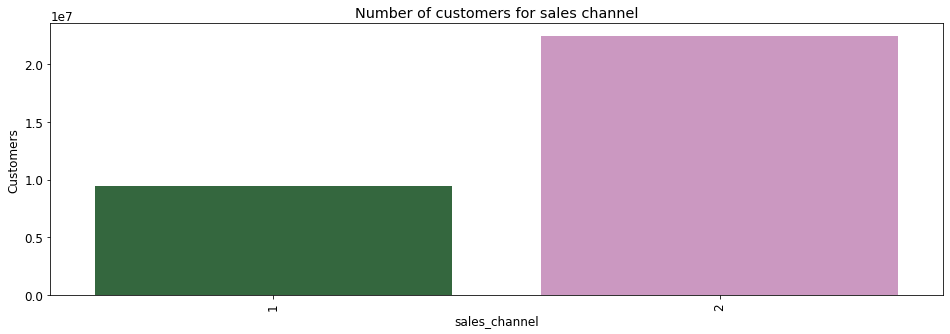

In [122]:
# Discovering correlations...why sales_channel_2 is correlated 

import seaborn as sns

temp = transactions.groupby(["sales_channel_id"])["customer_id"].count()
print(temp.index, temp.values)
df = pd.DataFrame({"sales_channel": temp.index, "Customers": temp.values})
df = df.sort_values(["sales_channel"], ascending=False)
plt.figure(figsize=(16, 5))
plt.title("Number of customers for sales channel")
s = sns.barplot(x="sales_channel", y="Customers", data=df, palette="cubehelix")
s.set_xticklabels(s.get_xticklabels(), rotation=90)
locs, labels = plt.xticks()
plt.show()

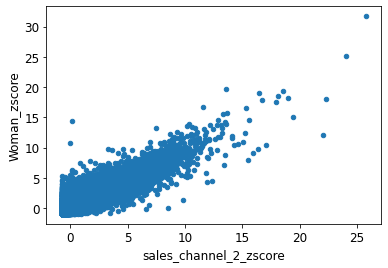

In [123]:
# Plot the correlation between Woman count and transaction with sales_channel_2

customers_norm.plot(kind = 'scatter', x = 'sales_channel_2_zscore', y = 'Woman_zscore')

plt.show()

#Features are very correlated

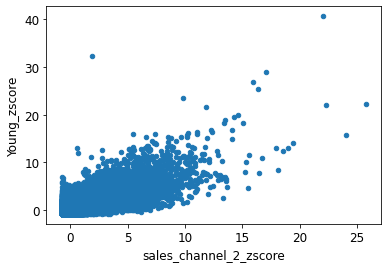

In [124]:
# Plot correlation between sales_channel_2 and Young count

customers_norm.plot(kind = 'scatter', x = 'sales_channel_2_zscore', y = 'Young_zscore')

plt.show()

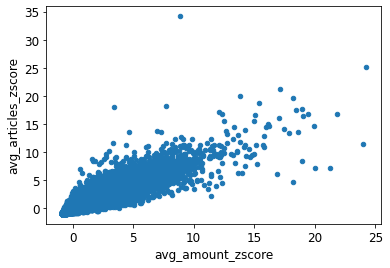

In [125]:
# Plot correlation between avg_amount_zscore and avg_articles_zscore

customers_norm.plot(kind = 'scatter', x = 'avg_amount_zscore', y = 'avg_articles_zscore')

plt.show()

In [126]:
# I begin deleting sales_channel_2 and one hot encoded that are very correlated (Non-Active, FN_no)(fn_frequency_none, Non-Active)
# (FN_yes, fn_frequency_regularly)
customers_3 = customers_2.drop("sales_channel_2_zscore", 1)
customers_3 = customers_3.drop("FN_no", 1)
customers_3 = customers_3.drop("fn_frequency_none", 1)
customers_3 = customers_3.drop("FN_yes", 1)
customers_3 = customers_3.drop("Active", 1)
customers_3 = customers_3.drop("Non-Active", 1)
#customers=customers.drop('avg_amount_zscore',1)

In [127]:
# Matrice di correlazione
corr_df = customers_3.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,age_zscore,sales_channel_1_zscore,Woman_zscore,Young_zscore,Man_zscore,Have-kids_zscore,Sports-person_zscore,ratio_perc_concrete_2018_zscore,ratio_perc_concrete_2019_zscore,ratio_perc_concrete_2020_zscore,ratio_garment_total_2018_zscore,ratio_garment_total_2019_zscore,ratio_garment_total_2020_zscore,avg_amount_zscore,avg_articles_zscore,club_status_active,club_status_leftclub,club_status_precreate,fn_frequency_monthly,fn_frequency_regularly
age_zscore,1.000000,0.086374,0.034043,-0.070445,0.081094,0.116722,-0.014880,-0.034851,-0.037375,-0.024660,-0.051920,-0.046785,0.001037,0.055168,0.033043,-0.000702,-0.002496,0.001456,0.001651,0.030852
sales_channel_1_zscore,0.086374,1.000000,0.332700,0.183977,0.236390,0.190253,0.150809,-0.112983,-0.261191,-0.227683,-0.140653,-0.273126,-0.223306,0.218566,0.310466,0.013666,0.001322,-0.014614,0.000003,0.022139
Woman_zscore,0.034043,0.332700,1.000000,0.612827,0.224617,0.207706,0.353645,-0.280289,-0.480985,-0.418663,-0.384835,-0.556171,-0.482304,0.868163,0.883770,0.006341,-0.000037,-0.006592,-0.007069,0.034692
Young_zscore,-0.070445,0.183977,0.612827,1.000000,0.175422,0.184237,0.262873,-0.257319,-0.406888,-0.343092,-0.318446,-0.445812,-0.368645,0.634716,0.737941,0.003873,0.000501,-0.004179,-0.006251,0.028599
Man_zscore,0.081094,0.236390,0.224617,0.175422,1.000000,0.155240,0.109277,-0.123784,-0.198575,-0.182711,-0.162978,-0.222666,-0.185764,0.305389,0.343374,0.003679,0.002612,-0.004589,-0.002825,0.023265
Have-kids_zscore,0.116722,0.190253,0.207706,0.184237,0.155240,1.000000,0.080593,-0.170836,-0.202491,-0.164991,-0.167016,-0.183589,-0.152371,0.253328,0.330700,0.001771,-0.001064,-0.001535,-0.002642,0.020591
Sports-person_zscore,-0.014880,0.150809,0.353645,0.262873,0.109277,0.080593,1.000000,-0.109426,-0.199511,-0.175102,-0.206287,-0.275023,-0.254514,0.382043,0.398464,0.002714,-0.000977,-0.002542,-0.002806,-0.015497
ratio_perc_concrete_2018_zscore,-0.034851,-0.112983,-0.280289,-0.257319,-0.123784,-0.170836,-0.109426,1.000000,0.198397,0.138097,0.340548,0.190025,0.135101,-0.355349,-0.396077,-0.003070,0.000366,0.003090,0.002313,-0.010489
ratio_perc_concrete_2019_zscore,-0.037375,-0.261191,-0.480985,-0.406888,-0.198575,-0.202491,-0.199511,0.198397,1.000000,0.269716,0.235670,0.525387,0.268266,-0.441884,-0.480766,-0.006313,0.002078,0.005970,0.005999,-0.023687
ratio_perc_concrete_2020_zscore,-0.024660,-0.227683,-0.418663,-0.343092,-0.182711,-0.164991,-0.175102,0.138097,0.269716,1.000000,0.159287,0.268224,0.437066,-0.334656,-0.358976,-0.004538,-0.001213,0.005077,0.005471,-0.026116


In [128]:
customers_3=customers_3.drop('avg_articles_zscore',1)

corr_df = customers_3.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,age_zscore,sales_channel_1_zscore,Woman_zscore,Young_zscore,Man_zscore,Have-kids_zscore,Sports-person_zscore,ratio_perc_concrete_2018_zscore,ratio_perc_concrete_2019_zscore,ratio_perc_concrete_2020_zscore,ratio_garment_total_2018_zscore,ratio_garment_total_2019_zscore,ratio_garment_total_2020_zscore,avg_amount_zscore,club_status_active,club_status_leftclub,club_status_precreate,fn_frequency_monthly,fn_frequency_regularly
age_zscore,1.000000,0.086374,0.034043,-0.070445,0.081094,0.116722,-0.014880,-0.034851,-0.037375,-0.024660,-0.051920,-0.046785,0.001037,0.055168,-0.000702,-0.002496,0.001456,0.001651,0.030852
sales_channel_1_zscore,0.086374,1.000000,0.332700,0.183977,0.236390,0.190253,0.150809,-0.112983,-0.261191,-0.227683,-0.140653,-0.273126,-0.223306,0.218566,0.013666,0.001322,-0.014614,0.000003,0.022139
Woman_zscore,0.034043,0.332700,1.000000,0.612827,0.224617,0.207706,0.353645,-0.280289,-0.480985,-0.418663,-0.384835,-0.556171,-0.482304,0.868163,0.006341,-0.000037,-0.006592,-0.007069,0.034692
Young_zscore,-0.070445,0.183977,0.612827,1.000000,0.175422,0.184237,0.262873,-0.257319,-0.406888,-0.343092,-0.318446,-0.445812,-0.368645,0.634716,0.003873,0.000501,-0.004179,-0.006251,0.028599
Man_zscore,0.081094,0.236390,0.224617,0.175422,1.000000,0.155240,0.109277,-0.123784,-0.198575,-0.182711,-0.162978,-0.222666,-0.185764,0.305389,0.003679,0.002612,-0.004589,-0.002825,0.023265
Have-kids_zscore,0.116722,0.190253,0.207706,0.184237,0.155240,1.000000,0.080593,-0.170836,-0.202491,-0.164991,-0.167016,-0.183589,-0.152371,0.253328,0.001771,-0.001064,-0.001535,-0.002642,0.020591
Sports-person_zscore,-0.014880,0.150809,0.353645,0.262873,0.109277,0.080593,1.000000,-0.109426,-0.199511,-0.175102,-0.206287,-0.275023,-0.254514,0.382043,0.002714,-0.000977,-0.002542,-0.002806,-0.015497
ratio_perc_concrete_2018_zscore,-0.034851,-0.112983,-0.280289,-0.257319,-0.123784,-0.170836,-0.109426,1.000000,0.198397,0.138097,0.340548,0.190025,0.135101,-0.355349,-0.003070,0.000366,0.003090,0.002313,-0.010489
ratio_perc_concrete_2019_zscore,-0.037375,-0.261191,-0.480985,-0.406888,-0.198575,-0.202491,-0.199511,0.198397,1.000000,0.269716,0.235670,0.525387,0.268266,-0.441884,-0.006313,0.002078,0.005970,0.005999,-0.023687
ratio_perc_concrete_2020_zscore,-0.024660,-0.227683,-0.418663,-0.343092,-0.182711,-0.164991,-0.175102,0.138097,0.269716,1.000000,0.159287,0.268224,0.437066,-0.334656,-0.004538,-0.001213,0.005077,0.005471,-0.026116


In [129]:
customers_4=customers_3.drop('avg_amount_zscore', 1)

corr_df = customers_4.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,age_zscore,sales_channel_1_zscore,Woman_zscore,Young_zscore,Man_zscore,Have-kids_zscore,Sports-person_zscore,ratio_perc_concrete_2018_zscore,ratio_perc_concrete_2019_zscore,ratio_perc_concrete_2020_zscore,ratio_garment_total_2018_zscore,ratio_garment_total_2019_zscore,ratio_garment_total_2020_zscore,club_status_active,club_status_leftclub,club_status_precreate,fn_frequency_monthly,fn_frequency_regularly
age_zscore,1.000000,0.086374,0.034043,-0.070445,0.081094,0.116722,-0.014880,-0.034851,-0.037375,-0.024660,-0.051920,-0.046785,0.001037,-0.000702,-0.002496,0.001456,0.001651,0.030852
sales_channel_1_zscore,0.086374,1.000000,0.332700,0.183977,0.236390,0.190253,0.150809,-0.112983,-0.261191,-0.227683,-0.140653,-0.273126,-0.223306,0.013666,0.001322,-0.014614,0.000003,0.022139
Woman_zscore,0.034043,0.332700,1.000000,0.612827,0.224617,0.207706,0.353645,-0.280289,-0.480985,-0.418663,-0.384835,-0.556171,-0.482304,0.006341,-0.000037,-0.006592,-0.007069,0.034692
Young_zscore,-0.070445,0.183977,0.612827,1.000000,0.175422,0.184237,0.262873,-0.257319,-0.406888,-0.343092,-0.318446,-0.445812,-0.368645,0.003873,0.000501,-0.004179,-0.006251,0.028599
Man_zscore,0.081094,0.236390,0.224617,0.175422,1.000000,0.155240,0.109277,-0.123784,-0.198575,-0.182711,-0.162978,-0.222666,-0.185764,0.003679,0.002612,-0.004589,-0.002825,0.023265
Have-kids_zscore,0.116722,0.190253,0.207706,0.184237,0.155240,1.000000,0.080593,-0.170836,-0.202491,-0.164991,-0.167016,-0.183589,-0.152371,0.001771,-0.001064,-0.001535,-0.002642,0.020591
Sports-person_zscore,-0.014880,0.150809,0.353645,0.262873,0.109277,0.080593,1.000000,-0.109426,-0.199511,-0.175102,-0.206287,-0.275023,-0.254514,0.002714,-0.000977,-0.002542,-0.002806,-0.015497
ratio_perc_concrete_2018_zscore,-0.034851,-0.112983,-0.280289,-0.257319,-0.123784,-0.170836,-0.109426,1.000000,0.198397,0.138097,0.340548,0.190025,0.135101,-0.003070,0.000366,0.003090,0.002313,-0.010489
ratio_perc_concrete_2019_zscore,-0.037375,-0.261191,-0.480985,-0.406888,-0.198575,-0.202491,-0.199511,0.198397,1.000000,0.269716,0.235670,0.525387,0.268266,-0.006313,0.002078,0.005970,0.005999,-0.023687
ratio_perc_concrete_2020_zscore,-0.024660,-0.227683,-0.418663,-0.343092,-0.182711,-0.164991,-0.175102,0.138097,0.269716,1.000000,0.159287,0.268224,0.437066,-0.004538,-0.001213,0.005077,0.005471,-0.026116


In [130]:
## From this 18 features I apply clustering K Means with Elbow Method
from sklearn.cluster import KMeans

print(customers_4.dtypes)

customers_5 = customers_4.drop ('customer_id', 1)

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(customers_5)
    distortions.append(kmeanModel.inertia_)


customer_id                         object
age_zscore                         float64
sales_channel_1_zscore             float64
Woman_zscore                       float64
Young_zscore                       float64
Man_zscore                         float64
Have-kids_zscore                   float64
Sports-person_zscore               float64
ratio_perc_concrete_2018_zscore    float64
ratio_perc_concrete_2019_zscore    float64
ratio_perc_concrete_2020_zscore    float64
ratio_garment_total_2018_zscore    float64
ratio_garment_total_2019_zscore    float64
ratio_garment_total_2020_zscore    float64
club_status_active                 float64
club_status_leftclub               float64
club_status_precreate              float64
fn_frequency_monthly               float64
fn_frequency_regularly             float64
dtype: object


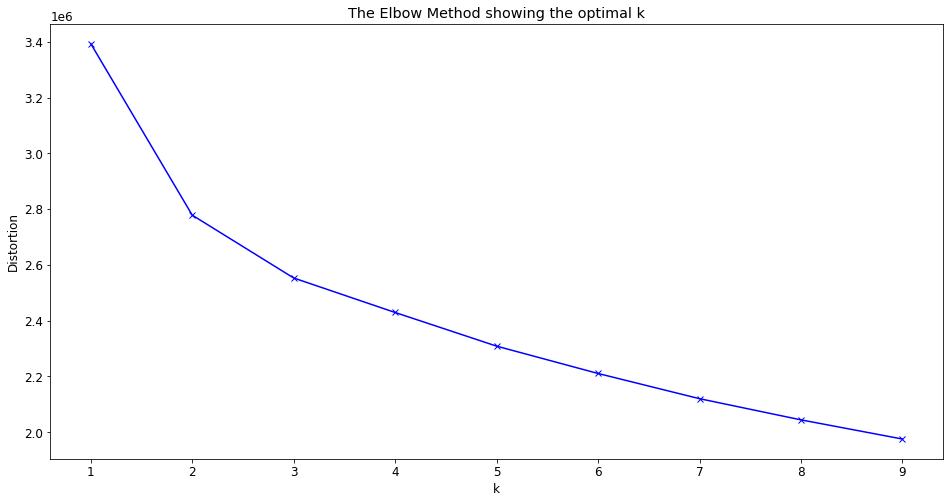

In [131]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [132]:
customers_5.head()

,age_zscore,sales_channel_1_zscore,Woman_zscore,Young_zscore,Man_zscore,Have-kids_zscore,Sports-person_zscore,ratio_perc_concrete_2018_zscore,ratio_perc_concrete_2019_zscore,ratio_perc_concrete_2020_zscore,ratio_garment_total_2018_zscore,ratio_garment_total_2019_zscore,ratio_garment_total_2020_zscore,club_status_active,club_status_leftclub,club_status_precreate,fn_frequency_monthly,fn_frequency_regularly
0,1.069614,-0.544905,-0.678354,-0.690037,-0.343362,0.433308,-0.492059,0.529347,1.242241,0.906355,-1.029630,1.318177,0.185035,1.0,0.0,0.0,0.0,0.0
1,-0.786758,-0.739161,0.472837,0.254627,-0.474488,0.279584,-0.297919,-1.792524,-0.782610,0.198049,-0.386510,-0.454183,-0.938195,1.0,0.0,0.0,0.0,0.0
2,1.301661,-0.884853,-0.725341,-0.801173,-0.474488,-0.335312,-0.103778,0.529347,1.242241,0.906355,1.542852,0.522423,-0.118059,1.0,0.0,0.0,0.0,1.0
3,-0.245316,-0.836289,0.989698,1.088154,-0.474488,-0.335312,-0.103778,-1.078102,-1.113949,-1.218565,-0.989435,-1.069084,-0.239296,1.0,0.0,0.0,0.0,1.0
4,1.611056,-0.933417,0.872230,0.754743,6.344053,-0.335312,0.090362,-0.863776,0.378305,-0.687335,-1.351190,-1.017745,-1.288338,1.0,0.0,0.0,0.0,1.0


In [133]:
# The number of clusters is 3, before the curve flattens
kmeans_model = KMeans(n_clusters = 3, n_init=15)

label = kmeans_model.fit_predict(customers_5.to_numpy())

centroids = kmeans_model.cluster_centers_



In [134]:
#2-dimensional plotting on two random dimensions
'''u_labels = np.unique(label)

print(u_labels)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(customers_4.to_numpy()[label == i , 'club_status_active'] , customers_4.to_numpy()[label == i , 'age_zscore'] , label = i, alpha=0.5)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k', alpha=0.5)
plt.legend()
plt.show()'''

"u_labels = np.unique(label)\n\nprint(u_labels)\n \n#plotting the results:\n \nfor i in u_labels:\n    plt.scatter(customers_4.to_numpy()[label == i , 'club_status_active'] , customers_4.to_numpy()[label == i , 'age_zscore'] , label = i, alpha=0.5)\nplt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k', alpha=0.5)\nplt.legend()\nplt.show()"

In [135]:
# We want a multidimensional view on our data, so we plot parallel coodrinates

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(customers_5.to_numpy())
scaled_df = pd.DataFrame(scaled_df)
customers_4["cluster"] = kmeans_model.labels_
final_df = pd.concat([scaled_df, customers_4['cluster']], axis=1)


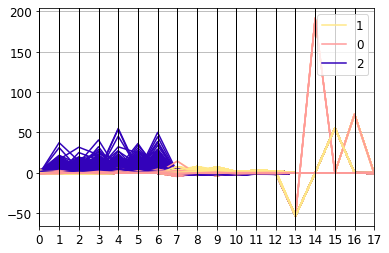

In [136]:
# plot parallel coordinates
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'cluster', color=('#FFE888', '#FF9999','#3302ba'))

In [137]:
# Print cohordinates of the centroids -> i cannot plot the centroids because i'm in a multidimensional space

print(kmeans_model.cluster_centers_)

[[ 3.27655582e-02  1.28014398e-01  7.61696556e-02  3.04161689e-02
   2.03640962e-02 -2.30131256e-02  1.26800998e-02 -1.05391498e-01
  -3.52414424e-01 -2.51952233e-01 -2.29724660e-01 -4.00019670e-01
  -3.41789009e-01  9.99793098e-01  4.96565422e-05  1.57245717e-04
   1.15865265e-04  4.53099396e-01]
 [-6.81654756e-02 -3.82299243e-01 -5.79349014e-01 -4.67365488e-01
  -2.66686570e-01 -2.20345455e-01 -2.93816181e-01  3.39817844e-01
   6.79975167e-01  5.48216072e-01  5.04354582e-01  7.38926850e-01
   6.46819448e-01  9.99431379e-01  9.32166261e-06  5.59299757e-04
   3.26258191e-04  4.52641293e-01]
 [ 1.19632039e-01  9.11242015e-01  1.88881438e+00  1.65747652e+00
   9.32817545e-01  9.42447038e-01  1.06976249e+00 -8.46182371e-01
  -1.08317141e+00 -1.01197158e+00 -9.39926365e-01 -1.10357730e+00
  -1.00208633e+00  9.99857306e-01 -2.77826807e-19  1.42694064e-04
   9.32413868e-18  4.99179509e-01]]


                                         customer_id  age_zscore  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...    1.069614   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...   -0.786758   
2  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...    1.301661   
3  00007d2de826758b65a93dd24ce629ed66842531df6699...   -0.245316   
4  00009d946eec3ea54add5ba56d5210ea898def4b46c685...    1.611056   

   sales_channel_1_zscore  Woman_zscore  Young_zscore  Man_zscore  \
0               -0.544905     -0.678354     -0.690037   -0.343362   
1               -0.739161      0.472837      0.254627   -0.474488   
2               -0.884853     -0.725341     -0.801173   -0.474488   
3               -0.836289      0.989698      1.088154   -0.474488   
4               -0.933417      0.872230      0.754743    6.344053   

   Have-kids_zscore  Sports-person_zscore  ratio_perc_concrete_2018_zscore  \
0          0.433308             -0.492059                         0.529347   
1          0.279584 

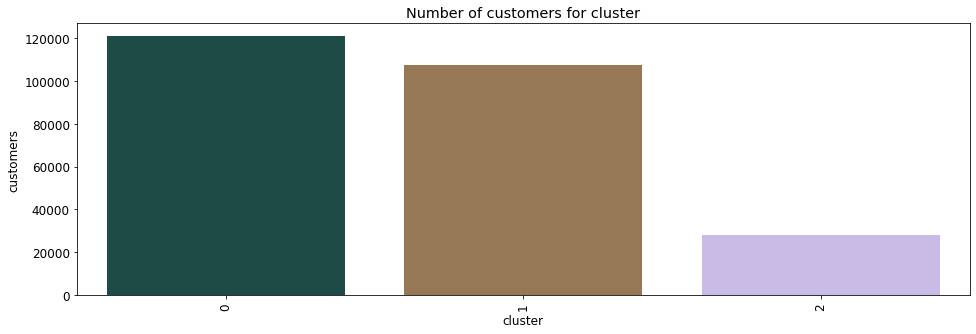

In [138]:
# Plot histograms that represent the distribution of the cluster in respect to each feature

# How many instances do we have for each cluster?
print(customers_4.head())
temp = customers_4.groupby(["cluster"])["customer_id"].count()
print(temp.index, temp.values)
df = pd.DataFrame({"cluster": temp.index, "customers": temp.values})
df = df.sort_values(["cluster"], ascending=False)
plt.figure(figsize=(16, 5))
plt.title("Number of customers for cluster")
s = sns.barplot(x="cluster", y="customers", data=df, palette="cubehelix")
s.set_xticklabels(s.get_xticklabels(), rotation=90)
locs, labels = plt.xticks()
plt.show()

In [139]:
print(len(customers_4['customer_id']))

256139


In [140]:
def distance(arr1, arr2):
    distances=[]
    for k in range(len(arr2)):
        d= (arr2[k])**2- (arr1[k])**2
        distances.append(d)
    return distances

In [141]:
eucl_distances_01= distance ([-6.68466560e-02, -3.78484772e-01, -5.75117304e-01, -4.64434090e-01,
  -2.65149011e-01, -2.19163232e-01, -2.91854463e-01,  3.38399825e-01,
   6.70030879e-01,  5.42342987e-01,  4.98424495e-01,  7.24702901e-01,
   6.35401606e-01,  9.99423573e-01,  9.14963310e-06,  5.67277252e-04,
   3.20237158e-04,  4.52028474e-01],[ 1.20020720e-01,  9.25937220e-01,  1.93334089e+00,  1.69913707e+00,
   9.54138869e-01,  9.70094137e-01,  1.10008314e+00, -8.54767643e-01,
  -1.09257152e+00, -1.02457787e+00, -9.50717618e-01, -1.11265651e+00,
  -1.01275105e+00,  9.99850763e-01, -2.84603070e-19,  1.49237026e-04,
   9.21571847e-18,  5.00876768e-01] )

eucl_distances_02= distance ([-6.68466560e-02, -3.78484772e-01, -5.75117304e-01, -4.64434090e-01,
  -2.65149011e-01, -2.19163232e-01, -2.91854463e-01,  3.38399825e-01,
   6.70030879e-01,  5.42342987e-01,  4.98424495e-01,  7.24702901e-01,
   6.35401606e-01,  9.99423573e-01,  9.14963310e-06,  5.67277252e-04,
   3.20237158e-04,  4.52028474e-01], [ 3.40632700e-02,  1.37853579e-01,  9.19472737e-02 , 4.34671903e-02,
   2.83685032e-02, -1.70624189e-02,  2.00964098e-02, -1.17248408e-01,
  -3.66089873e-01, -2.65016192e-01, -2.41521487e-01, -4.11382235e-01,
  -3.52383473e-01,  9.99808400e-01,  4.99825061e-05,  1.41617101e-04,
   1.16625848e-04,  4.53757851e-01])

eucl_distances_12= distance([ 1.20020720e-01,  9.25937220e-01,  1.93334089e+00,  1.69913707e+00,
   9.54138869e-01,  9.70094137e-01,  1.10008314e+00, -8.54767643e-01,
  -1.09257152e+00, -1.02457787e+00, -9.50717618e-01, -1.11265651e+00,
  -1.01275105e+00,  9.99850763e-01, -2.84603070e-19,  1.49237026e-04,
   9.21571847e-18,  5.00876768e-01],[ 3.40632700e-02,  1.37853579e-01,  9.19472737e-02 , 4.34671903e-02,
   2.83685032e-02, -1.70624189e-02,  2.00964098e-02, -1.17248408e-01,
  -3.66089873e-01, -2.65016192e-01, -2.41521487e-01, -4.11382235e-01,
  -3.52383473e-01,  9.99808400e-01,  4.99825061e-05,  1.41617101e-04,
   1.16625848e-04,  4.53757851e-01])

print(eucl_distances_01)
print(eucl_distances_02)
print(eucl_distances_12)

[0.009936497810936062, 0.7141090127454364, 3.4070470835857636, 2.671367758694056, 0.8400769833023211, 0.893050112381089, 1.1250038873392412, 0.6161132819597447, 0.7447711475015977, 0.7556238961456545, 0.6554370119595888, 0.7128102145275645, 0.6219294883687236, 0.0008540700035958304, -8.37157858646156e-11, -2.9953179070734686e-07, -1.0255183736391695e-07, 0.046547795415357196]
[-0.003308169055289437, -0.12424711339278276, -0.32230561221936577, -0.2138096273215517, -0.06949922606046971, -0.04774139612196675, -0.08477516188616883, -0.10076725238149616, -0.3149195837003565, -0.22390233352590136, -0.19009434853331386, -0.35595895144422063, -0.27956108886383746, 0.0007693584424738331, 2.414535130171922e-09, -3.0174807734102735e-07, -8.895024894219785e-08, 0.0015664460373695233]
[-0.0132446668662255, -0.8383561261382191, -3.729352695805129, -2.885177386015608, -0.9095762093627907, -0.9407915085030557, -1.2097790492254101, -0.7168805343412409, -1.0596907312019541, -0.9795262296715559, -0.84553

In [142]:
# Since visualizing the clusters in this way is very low informative, i need to select the visualization of clusters among the
# most promising features

#filter rows of original data
'''filtered_label0 = customers_4[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()
'''

'filtered_label0 = customers_4[label == 0]\n \n#plotting the results\nplt.scatter(filtered_label0[:,0] , filtered_label0[:,1])\nplt.show()\n'

In [143]:
from sklearn.metrics import silhouette_samples, silhouette_score
customers_6 = customers_4.drop('customer_id',1)

#silhouette_avg = silhouette_score(customers_6, kmeans_model.labels_, metric='euclidean')
#print(silhouette_avg)

# 0.1508247383923039 is the silhouette score without dimensionality reduction, with 3 clusters. Is near to 0, so clusters overlap.

In [144]:
'''customers.head()

cluster_df = pd.concat([
   customers, 
   customers_6['cluster']], 
axis=1)

for c in customers_6.columns[1:]:
    grid = sns.FacetGrid(cluster_df, col='cluster', height=3, aspect=1.3)
    grid.map(plt.hist, c, bins=20, edgecolor='k')
    grid.set_xticklabels(rotation=40)'''

"customers.head()\n\ncluster_df = pd.concat([\n   customers, \n   customers_6['cluster']], \naxis=1)\n\nfor c in customers_6.columns[1:]:\n    grid = sns.FacetGrid(cluster_df, col='cluster', height=3, aspect=1.3)\n    grid.map(plt.hist, c, bins=20, edgecolor='k')\n    grid.set_xticklabels(rotation=40)"

In [145]:
'''def prepare_pca(n_components, data, kmeans_labels):
    names = ['x', 'y', 'z']
    matrix = PCA(n_components=n_components).fit_transform(data)
    df_matrix = pd.DataFrame(matrix)
    df_matrix.rename({i:names[i] for i in range(n_components)}, axis=1, inplace=True)
    df_matrix['labels'] = kmeans_labels
    
    return df_matrix'''

"def prepare_pca(n_components, data, kmeans_labels):\n    names = ['x', 'y', 'z']\n    matrix = PCA(n_components=n_components).fit_transform(data)\n    df_matrix = pd.DataFrame(matrix)\n    df_matrix.rename({i:names[i] for i in range(n_components)}, axis=1, inplace=True)\n    df_matrix['labels'] = kmeans_labels\n    \n    return df_matrix"

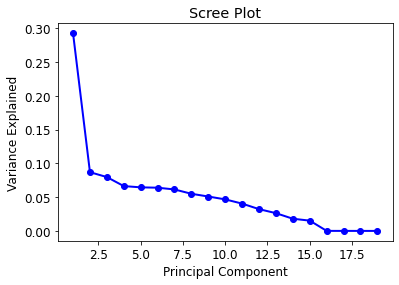

In [146]:
# We plot the variance that the features have for the overall data. We are now considering all the features of data and check 
# the variance explained by the components. 

from sklearn.decomposition import PCA

customers_5 = customers_4.drop('cluster',1)
customers_no_id = customers_4.drop('customer_id',1)


pca = PCA(copy=True).fit(customers_no_id)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

The total variance is explained at about 15.5/ 16 components as this scree plot explains. 

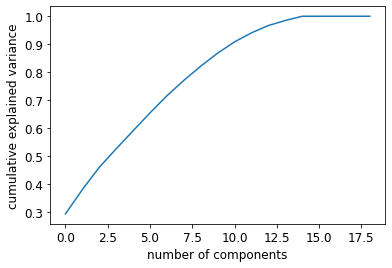

In [147]:
# Now I try performing the PCA and check the cumulative explained variance. 

# From this fitting we check how many components we need to retain to preserve a certain percentage of variance in the data.

pca = PCA().fit(customers_no_id)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

From this graph it's visible that to retain between 90% and 95% of the variance in data we need to save more than 10 components. For this reason i perform the PCA with a number of components equal to 13 before and then I try to reduce the components to 10.

In [148]:

'''pca = PCA(.95)
principalComponents = pca.fit_transform(customers_5)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])'''

"pca = PCA(.95)\nprincipalComponents = pca.fit_transform(customers_5)\nprincipalDf = pd.DataFrame(data = principalComponents\n             , columns = ['principal component 1', 'principal component 2'])"

In [149]:
# From the previous analysis I perform PCA with 13 features to check if the clusters have good quality if we consider 13 components

pcaObj_13 = PCA(copy=True, n_components=13).fit(customers_no_id)
matrix_pca_13 = pcaObj_13.transform(customers_no_id)

print(matrix_pca_13.shape)

# We try to perform Kmeans on the matrix with 13 features 

distortions_pca = []
K_pca = range(1,13)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(matrix_pca_13)
    distortions_pca.append(kmeanModel.inertia_)
    

# The number of clusters is 3, before the curve flattens
kmeans_model_pca_13 = KMeans(n_clusters = 3, n_init=15)

model_pca_13 = kmeans_model_pca_13.fit_predict(matrix_pca_13)

centroids_pca_13 = kmeans_model_pca_13.cluster_centers_

print(centroids_pca_13)

(256139, 13)
[[ 4.01504924e+00  1.27814323e-01 -1.95717515e-01  7.59623725e-01
   3.31603986e-01  2.87695463e-01 -3.62320406e-01  2.66774872e-01
   6.46374121e-01 -2.53357540e-01 -1.19222232e-03 -1.00718704e-01
  -3.36002501e-01]
 [-1.68321055e+00  4.80215579e-02 -8.83630977e-02  3.23146560e-01
   1.62727092e-01  1.25122286e-01 -1.57299303e-01  9.60503888e-02
   2.71229821e-01 -1.16394632e-01 -1.64624813e-02 -1.00049480e-02
  -1.05852511e-01]
 [ 5.66648560e-01 -7.22694837e-02  1.23844334e-01 -4.63059778e-01
  -2.21396051e-01 -1.77808052e-01  2.23682098e-01 -1.47125608e-01
  -3.90699687e-01  1.62102056e-01  1.49081467e-02  3.22073882e-02
   1.71863031e-01]]


In [150]:
# silhouette score for clusters with 13 features
#silhouette_avg_pca_13 = silhouette_score(matrix_pca_13, kmeans_model_pca_13.labels_ , metric='euclidean')
#print(silhouette_avg_pca_13)

# It is very very low 0.15252273008195222

In [151]:
# Now I perform PCA with 10 features to check if we can improve the situation
pcaObj = PCA(copy=True, n_components=10).fit(customers_no_id)
matrix_pca_10 = pcaObj.transform(customers_no_id)

print(matrix_pca_10.shape)

# We try to perform Kmeans on the matrix with 10 features 

distortions_pca = []
K_pca = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(matrix_pca_10)
    distortions_pca.append(kmeanModel.inertia_)

(256139, 10)


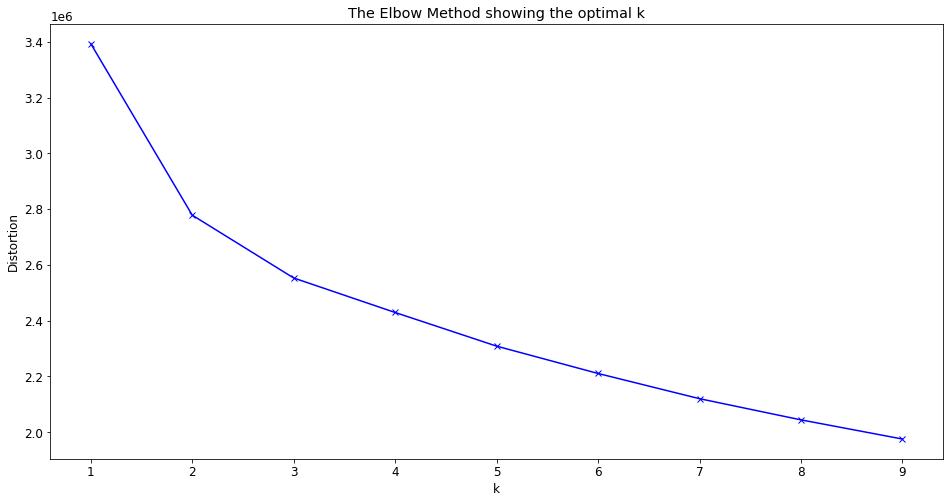

In [152]:
plt.figure(figsize=(16,8))
plt.plot(K_pca, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [153]:
# The number of clusters before the curve flattens is always 3. So we perform the clustering using 3 clusters.

# The number of clusters is 3, before the curve flattens
kmeans_model_pca_10 = KMeans(n_clusters = 3, n_init=15)

model_pca_10 = kmeans_model_pca_10.fit_predict(matrix_pca_10)

centroids_pca_10 = kmeans_model_pca_10.cluster_centers_

#customers_no_id["cluster"] = kmeans_model_pca.labels_

print(centroids_pca_10)


[[ 4.01504924  0.12781432 -0.19571752  0.75962373  0.33160399  0.28769546
  -0.36232041  0.26677487  0.64637412 -0.25335754]
 [-1.68304039  0.04801111 -0.0884304   0.32315534  0.1627536   0.12504081
  -0.15727917  0.09600716  0.27126096 -0.11643068]
 [ 0.5667208  -0.07227214  0.12392524 -0.46314569 -0.22145778 -0.17776571
   0.22370205 -0.14711134 -0.39079313  0.16216177]]


In [154]:
#silhouette_avg_pca = silhouette_score(matrix_pca, kmeans_model_pca_10.labels_ , metric='euclidean')
#print(silhouette_avg_pca)

# PCA using 10 components has improved a little bit but it's still not acceptable. It's 0.17500449076163396

We check with the methods to find k using the singular values if it's possible to improve the choice of the k. We use methods
like Cumulative Percentage of total variation and Kaiser Rule. 

In [155]:
##### DELETE THIS METHOD IS NOT EFFECTIVE

'''# Cumulative percentage of total variation to find k

def cumul_percentage(D, ts):
    t = 100.*np.cumsum(D**2.0)/np.sum(D**2.0)
    kt = np.argmin(t <= ts)
    return kt+1'''

'# Cumulative percentage of total variation to find k\n\ndef cumul_percentage(D, ts):\n    t = 100.*np.cumsum(D**2.0)/np.sum(D**2.0)\n    kt = np.argmin(t <= ts)\n    return kt+1'

In [156]:
'''# I try also to use the Cumulative Percentage of total variation method to find the k

# I need to center my data before applying cumulative percentage of total variation
#train_mean = (np.sum(customers_no_id, axis=1)/(customers_no_id.shape[1])).values.reshape(customers_no_id.shape[0], 1)
#centered_data= customers_no_id - train_mean


pca_cumul_perc = PCA(copy=True).fit(customers_no_id)

s_values = pca_cumul_perc.singular_values_
print(s_values)

k_components= cumul_percentage(s_values, .99)
print(k_components)
#print(customers_no_id.shape[1])
'''

'# I try also to use the Cumulative Percentage of total variation method to find the k\n\n# I need to center my data before applying cumulative percentage of total variation\n#train_mean = (np.sum(customers_no_id, axis=1)/(customers_no_id.shape[1])).values.reshape(customers_no_id.shape[0], 1)\n#centered_data= customers_no_id - train_mean\n\n\npca_cumul_perc = PCA(copy=True).fit(customers_no_id)\n\ns_values = pca_cumul_perc.singular_values_\nprint(s_values)\n\nk_components= cumul_percentage(s_values, .99)\nprint(k_components)\n#print(customers_no_id.shape[1])\n'

We check another method to find the number k of components to use to perform the PCA. For this reason we use the Kaiser Rule. 

We should take the number k of singular values that are below a certain quantity called meanvar, that expresses the sum of all the squared singular values divided by the number of the singular values. We're searching for the maximum number k that are below this quantity.

In [157]:
'''# Kaiser Rule

def kaiser_rule(D):
    t = D**2
    meanvar= np.sum(D**2)/len(D)
    print( t< meanvar)
    kk = np.argmax(t < meanvar)
    return kk'''

'# Kaiser Rule\n\ndef kaiser_rule(D):\n    t = D**2\n    meanvar= np.sum(D**2)/len(D)\n    print( t< meanvar)\n    kk = np.argmax(t < meanvar)\n    return kk'

In [158]:
'''pca_kaiser = PCA(copy=True).fit(customers_no_id)
k_components = kaiser_rule(pca_kaiser.singular_values_)
print(k_components)'''

'pca_kaiser = PCA(copy=True).fit(customers_no_id)\nk_components = kaiser_rule(pca_kaiser.singular_values_)\nprint(k_components)'

In [159]:
'''s_values_kaiser = pca_kaiser.singular_values_
print(s_values_kaiser)'''

's_values_kaiser = pca_kaiser.singular_values_\nprint(s_values_kaiser)'

Since the situation is very bad according to the quality of cluster, we try using another algorithm called Kmeans ++. We first perform it on the original data, then on pca data to check if something changes


In [160]:

# k means ++

kmeans_plusplus = KMeans(n_clusters=3, init='k-means++')

model_plusplus= kmeans_plusplus.fit_predict(customers_no_id)

print(kmeans_plusplus.cluster_centers_)


[[ 1.19957983e-01  9.13183460e-01  1.89086129e+00  1.65947099e+00
   9.34865783e-01  9.44416240e-01  1.07085973e+00 -8.46477578e-01
  -1.08363560e+00 -1.01233280e+00 -9.40455322e-01 -1.10392167e+00
  -1.00264380e+00  9.99856959e-01 -2.77826807e-19  1.43041053e-04
   9.32413868e-18  4.99249034e-01  2.00000000e+00]
 [ 3.23442925e-02  1.28122186e-01  7.70436714e-02  3.11687433e-02
   2.05637048e-02 -2.28873347e-02  1.31368269e-02 -1.06052122e-01
  -3.53141046e-01 -2.52765974e-01 -2.30225390e-01 -4.00654380e-01
  -3.42400817e-01  9.99793051e-01  4.96676407e-05  1.57280862e-04
   1.15891162e-04  4.53126164e-01 -1.46660462e-13]
 [-6.76320883e-02 -3.81978604e-01 -5.79137502e-01 -4.67260781e-01
  -2.66612748e-01 -2.20213808e-01 -2.93675162e-01  3.39774927e-01
   6.79537344e-01  5.48036383e-01  5.03956436e-01  7.38277361e-01
   6.46360105e-01  9.99431882e-01  9.31341504e-06  5.58804903e-04
   3.25969527e-04  4.52622658e-01  1.00000000e+00]]


In [161]:
#silhouette_plusplus = silhouette_score(customers_no_id, kmeans_plusplus.labels_ , metric='euclidean')

#print(silhouette_plusplus)

# The situation doesn't change at all...we see that there's no point in investigating more this approach

In [162]:
# We try to reduce the number of clusters to 2

kmeans_model_2 = KMeans(n_clusters = 2, n_init=10)

model_2 = kmeans_model_2.fit_predict(customers_no_id)

centroids_2 = kmeans_model_2.cluster_centers_

print(centroids_2)

[[ 8.19310398e-02  4.99939388e-01  8.41835176e-01  7.00940649e-01
   4.00804953e-01  3.51025657e-01  4.35709113e-01 -4.82381382e-01
  -7.44061290e-01 -6.60500220e-01 -6.02517555e-01 -7.68269863e-01
  -6.84597721e-01  9.99829861e-01  3.40278802e-05  1.36111521e-04
   5.67131336e-05  4.73225730e-01  6.34370428e-01]
 [-4.30018947e-02 -2.62395558e-01 -4.41841183e-01 -3.67892023e-01
  -2.10364380e-01 -1.84237480e-01 -2.28683994e-01  2.53180155e-01
   3.90524096e-01  3.46666672e-01  3.16234196e-01  4.03230080e-01
   3.59314360e-01  9.99553508e-01  2.38129257e-05  4.22679430e-04
   2.61942182e-04  4.49933324e-01  6.39210363e-01]]


Int64Index([0, 1], dtype='int64', name='cluster') [ 88451 167688]


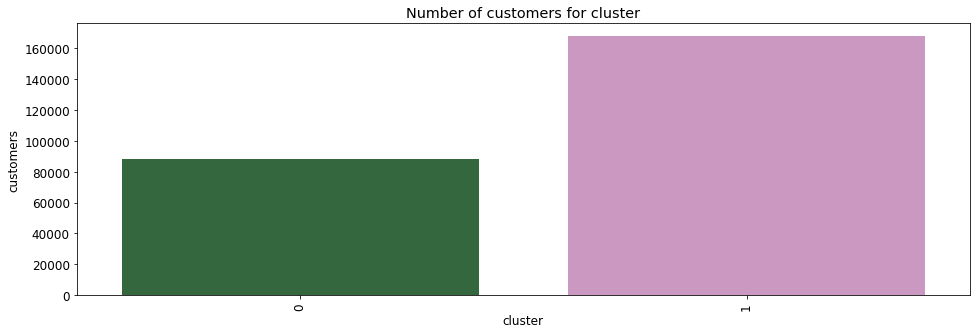

In [163]:
# Plot histograms that represent the distribution of the cluster in respect to each feature
customers_clusters=customers_5
customers_clusters['cluster']=kmeans_model_2.labels_

# How many instances do we have for each cluster?

temp = customers_clusters.groupby(["cluster"])["customer_id"].count()
print(temp.index, temp.values)
df = pd.DataFrame({"cluster": temp.index, "customers": temp.values})
df = df.sort_values(["cluster"], ascending=False)
plt.figure(figsize=(16, 5))
plt.title("Number of customers for cluster")
s = sns.barplot(x="cluster", y="customers", data=df, palette="cubehelix")
s.set_xticklabels(s.get_xticklabels(), rotation=90)
locs, labels = plt.xticks()
plt.show()

In [164]:
customers_2_no_clusters= customers_clusters.drop('cluster',1)
customers_2_no_clusters=customers_2_no_clusters.drop ('customer_id',1)

In [165]:
#silhouette_2 = silhouette_score(customers_2_no_clusters, kmeans_model_2.labels_, metric='euclidean')
#print(silhouette_2)

# Silhouette score in this case with 2 clusters has improved to 0.20806205776852424.

In [166]:
'''import yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(kmeans_model_2, colors='yellowbrick')
visualizer.fit(customers_no_id)       
visualizer.show()'''

"import yellowbrick\nfrom yellowbrick.cluster import SilhouetteVisualizer\n\nvisualizer = SilhouetteVisualizer(kmeans_model_2, colors='yellowbrick')\nvisualizer.fit(customers_no_id)       \nvisualizer.show()"

We see that the problem doesn't improve so much if we try to reduce the number of clusters, so we change algorithm

In [167]:
customers_2_no_clusters.head()

,age_zscore,sales_channel_1_zscore,Woman_zscore,Young_zscore,Man_zscore,Have-kids_zscore,Sports-person_zscore,ratio_perc_concrete_2018_zscore,ratio_perc_concrete_2019_zscore,ratio_perc_concrete_2020_zscore,ratio_garment_total_2018_zscore,ratio_garment_total_2019_zscore,ratio_garment_total_2020_zscore,club_status_active,club_status_leftclub,club_status_precreate,fn_frequency_monthly,fn_frequency_regularly
0,1.069614,-0.544905,-0.678354,-0.690037,-0.343362,0.433308,-0.492059,0.529347,1.242241,0.906355,-1.029630,1.318177,0.185035,1.0,0.0,0.0,0.0,0.0
1,-0.786758,-0.739161,0.472837,0.254627,-0.474488,0.279584,-0.297919,-1.792524,-0.782610,0.198049,-0.386510,-0.454183,-0.938195,1.0,0.0,0.0,0.0,0.0
2,1.301661,-0.884853,-0.725341,-0.801173,-0.474488,-0.335312,-0.103778,0.529347,1.242241,0.906355,1.542852,0.522423,-0.118059,1.0,0.0,0.0,0.0,1.0
3,-0.245316,-0.836289,0.989698,1.088154,-0.474488,-0.335312,-0.103778,-1.078102,-1.113949,-1.218565,-0.989435,-1.069084,-0.239296,1.0,0.0,0.0,0.0,1.0
4,1.611056,-0.933417,0.872230,0.754743,6.344053,-0.335312,0.090362,-0.863776,0.378305,-0.687335,-1.351190,-1.017745,-1.288338,1.0,0.0,0.0,0.0,1.0


In [168]:
# I try to use DBSCAN

from sklearn.cluster import DBSCAN
from matplotlib import pyplot

db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(customers_2_no_clusters)
labels = db_default.labels_



In [169]:
#silhouette_dbscan = silhouette_score(customers_2_no_clusters, db_default.labels_ , metric='euclidean')

#print(silhouette_dbscan)

#0.11179740105864867 

In [170]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3).fit(customers_2_no_clusters)  #, distance_threshold='euclidean'

labels_gmm = gmm.predict(customers_2_no_clusters)

print(labels_gmm)

[1 1 2 ... 2 1 2]


In [171]:

#silhouette_gmm = silhouette_score(customers_2_no_clusters, labels_gmm , metric='euclidean')

#print(silhouette_gmm)


# 0.015981522194971752 

Since I didn't reach anything interesting with KMeans (with 3 and 2 clusters), Kmeans with PCA, DBSCAN and GMM, I try to use neural network as feature extractor

In [172]:
# I try to use a multilayer perceptron as feature extractor. 

import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential, Model

np.random.seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

#model = keras.models.Sequential()
input = layers.Input(18)
encoder = layers.Dense(18,  activation='relu',name='start')(input)
encoder = layers.Dense(10,  activation='relu',name='middle')(encoder)
code = layers.Dense(5,  activation='relu',name='bottleneck')(encoder)

decoder = layers.Dense(10,  activation='relu')(code)
output = layers.Dense(18,  activation='linear')(decoder)

model = Model(inputs=input, outputs=output)

model.compile(loss='mse', optimizer='adam')

In [173]:
checkpoint_path = "encoder/checkp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [174]:
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [175]:
model.fit(customers_2_no_clusters, customers_2_no_clusters,  epochs=50, batch_size=16, callbacks=[cp_callback, callback])


Epoch 1/50
15991/16009 [============================>.] - ETA: 0s - loss: 0.2885
Epoch 00001: saving model to encoder\checkp.ckpt
16009/16009 [==============================] - 34s 2ms/step - loss: 0.2885
Epoch 2/50
15991/16009 [============================>.] - ETA: 0s - loss: 0.2469
Epoch 00002: saving model to encoder\checkp.ckpt
16009/16009 [==============================] - 31s 2ms/step - loss: 0.2469
Epoch 3/50
15995/16009 [============================>.] - ETA: 0s - loss: 0.2242
Epoch 00003: saving model to encoder\checkp.ckpt
16009/16009 [==============================] - 32s 2ms/step - loss: 0.2242
Epoch 4/50
15987/16009 [============================>.] - ETA: 0s - loss: 0.2154
Epoch 00004: saving model to encoder\checkp.ckpt
16009/16009 [==============================] - 34s 2ms/step - loss: 0.2153
Epoch 5/50
15999/16009 [============================>.] - ETA: 0s - loss: 0.2113
Epoch 00005: saving model to encoder\checkp.ckpt
16009/16009 [==============================] - 33s

In [176]:
model.save(checkpoint_dir)

INFO:tensorflow:Assets written to: encoder\assets


In [177]:
layer_that_i_need = model.get_layer(name='bottleneck', index=None)

In [178]:
print(layer_that_i_need)

In [179]:
# new model 
new_model = Model(inputs=input, outputs=code)

new_model.compile(loss='mse', optimizer='adam')

new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 18)]              0         
                                                                 
 start (Dense)               (None, 18)                342       
                                                                 
 middle (Dense)              (None, 10)                190       
                                                                 
 bottleneck (Dense)          (None, 5)                 55        
                                                                 
Total params: 587
Trainable params: 587
Non-trainable params: 0
_________________________________________________________________


In [180]:
result= new_model.predict(customers_2_no_clusters)

In [181]:
print(result.shape)

(256139, 5)


In [182]:
result_df = pd.DataFrame(result)

In [183]:
result_df.head()

,0,1,2,3,4
0,0.770149,1.911580,0.780853,2.771670,2.084773
1,1.582278,3.561474,3.382477,4.908352,1.930330
2,0.576309,2.535114,1.547008,2.022230,1.902954
3,1.883647,3.712450,3.758073,4.987504,2.422366
4,2.841686,2.289085,2.424459,8.874180,2.911865


In [184]:
# elbow method for new dataset
distortions = []
K = range(1,5)
for k in K:
    kmeanModelNN = KMeans(n_clusters=k)
    kmeanModelNN.fit(result_df)
    distortions.append(kmeanModelNN.inertia_)

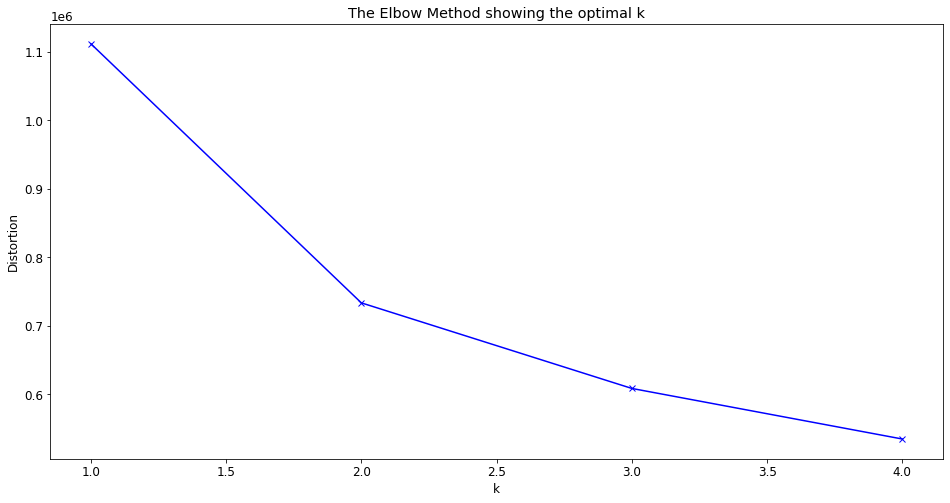

In [185]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [186]:
kmeans_NN = KMeans(n_clusters=3)

model_NN= kmeans_NN.fit_predict(result_df)

print(kmeans_NN.cluster_centers_)

[[1.4856628  3.2662847  2.7488277  4.084526   1.78292   ]
 [2.5961432  3.869285   4.023939   6.288682   2.5151458 ]
 [0.91837627 2.7095084  1.8801799  2.7974992  1.5395666 ]]


In [187]:
#silhouette_NN = silhouette_score(result_df, kmeans_NN.labels_, metric='euclidean')
#print(silhouette_NN)

# 0.34368813

In [188]:
# repeat for 2 clusters

kmeans_NN_2 = KMeans(n_clusters=2)

model_NN_2= kmeans_NN_2.fit_predict(result_df)

print(kmeans_NN_2.cluster_centers_)

[[2.0556526 3.519517  3.4021611 5.22325   2.1666625]
 [1.0724962 2.9090035 2.1406584 3.1622822 1.5883014]]


In [189]:
#silhouette_NN_2 = silhouette_score(result_df, kmeans_NN_2.labels_, metric='euclidean')
#print(silhouette_NN_2)

# Silhouette is 0.5249195

0.36146697


In [190]:
result_df.head()

,0,1,2,3,4
0,0.770149,1.911580,0.780853,2.771670,2.084773
1,1.582278,3.561474,3.382477,4.908352,1.930330
2,0.576309,2.535114,1.547008,2.022230,1.902954
3,1.883647,3.712450,3.758073,4.987504,2.422366
4,2.841686,2.289085,2.424459,8.874180,2.911865


Finally with Factor Analysis using an Autoencoder we managed to extract 5 informative features. This has allowed to reach an acceptable Silhouette score, meaning that the clusters are well distinguishable. Unfortunately, having used and extracted hidden features, the clusters are not interpretable.

In [191]:
#Plotting clusters

customers_clusters_NN=customers_5
customers_clusters_NN['cluster']=kmeans_NN_2.labels_


Int64Index([0, 1], dtype='int64', name='cluster') [ 69043 187096]


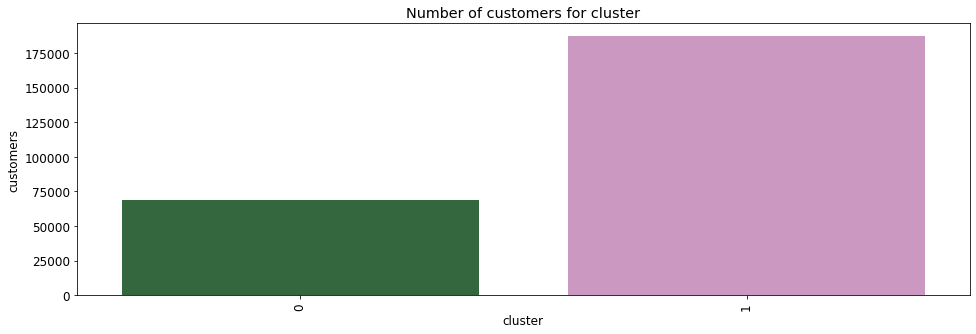

In [192]:
# How many instances do we have for each cluster?

temp = customers_clusters_NN.groupby(["cluster"])["customer_id"].count()
print(temp.index, temp.values)
df = pd.DataFrame({"cluster": temp.index, "customers": temp.values})
df = df.sort_values(["cluster"], ascending=False)
plt.figure(figsize=(16, 5))
plt.title("Number of customers for cluster")
s = sns.barplot(x="cluster", y="customers", data=df, palette="cubehelix")
s.set_xticklabels(s.get_xticklabels(), rotation=90)
locs, labels = plt.xticks()
plt.show()

In [193]:
customers_clusters_NN.head()

,customer_id,age_zscore,sales_channel_1_zscore,Woman_zscore,Young_zscore,Man_zscore,Have-kids_zscore,Sports-person_zscore,ratio_perc_concrete_2018_zscore,ratio_perc_concrete_2019_zscore,ratio_perc_concrete_2020_zscore,ratio_garment_total_2018_zscore,ratio_garment_total_2019_zscore,ratio_garment_total_2020_zscore,club_status_active,club_status_leftclub,club_status_precreate,fn_frequency_monthly,fn_frequency_regularly,cluster
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,1.069614,-0.544905,-0.678354,-0.690037,-0.343362,0.433308,-0.492059,0.529347,1.242241,0.906355,-1.029630,1.318177,0.185035,1.0,0.0,0.0,0.0,0.0,1
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,-0.786758,-0.739161,0.472837,0.254627,-0.474488,0.279584,-0.297919,-1.792524,-0.782610,0.198049,-0.386510,-0.454183,-0.938195,1.0,0.0,0.0,0.0,0.0,0
2,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.301661,-0.884853,-0.725341,-0.801173,-0.474488,-0.335312,-0.103778,0.529347,1.242241,0.906355,1.542852,0.522423,-0.118059,1.0,0.0,0.0,0.0,1.0,1
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,-0.245316,-0.836289,0.989698,1.088154,-0.474488,-0.335312,-0.103778,-1.078102,-1.113949,-1.218565,-0.989435,-1.069084,-0.239296,1.0,0.0,0.0,0.0,1.0,0
4,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,1.611056,-0.933417,0.872230,0.754743,6.344053,-0.335312,0.090362,-0.863776,0.378305,-0.687335,-1.351190,-1.017745,-1.288338,1.0,0.0,0.0,0.0,1.0,0


In [194]:
'''filtered_label2 = customers_clusters_NN['age_zscore']
 
filtered_label8 = customers_clusters_NN['sales_channel_1_zscore']
 
#Plotting the results
plt.scatter(filtered_label2 , color = 'red')
plt.scatter(filtered_label8, color = 'black')
plt.show()'''

"filtered_label2 = customers_clusters_NN['age_zscore']\n \nfiltered_label8 = customers_clusters_NN['sales_channel_1_zscore']\n \n#Plotting the results\nplt.scatter(filtered_label2 , color = 'red')\nplt.scatter(filtered_label8, color = 'black')\nplt.show()"

In [216]:
colonne=customers_pre_normalization.columns
colonne=list(colonne)
print(colonne)

for col in colonne:
    if '_zscore' in col:
        customers_pre_normalization = customers_pre_normalization.drop(col, 1)
    else:
        print('no');

['customer_id', 'FN', 'Active', 'club_member_status', 'fashion_news_frequency', 'age', 'tot_articles_2018', 'tot_articles_2019', 'tot_articles_2020', 'avg_articles_2018', 'avg_articles_2019', 'avg_articles_2020', 'sales_channel_1', 'sales_channel_2', 'tot_amount_2018', 'tot_amount_2019', 'tot_amount_2020', 'avg_amount_2018', 'avg_amount_2019', 'avg_amount_2020', 'Woman', 'Young', 'Man', 'Have-kids', 'Sports-person', 'count_colours_2018', 'count_colours_2019', 'count_colours_2020', 'count_garments_2018', 'count_garments_2019', 'count_garments_2020', 'count_perceived_2018', 'count_perceived_2019', 'count_perceived_2020', 'ratio_perc_concrete_2018', 'ratio_perc_concrete_2019', 'ratio_perc_concrete_2020', 'ratio_garment_total_2018', 'ratio_garment_total_2019', 'ratio_garment_total_2020', 'avg_amount', 'avg_articles', 'age_zscore', 'tot_articles_2018_zscore', 'tot_articles_2019_zscore', 'tot_articles_2020_zscore', 'avg_articles_2018_zscore', 'avg_articles_2019_zscore', 'avg_articles_2020_zs

In [217]:
customers_pre_normalization.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,tot_articles_2018,tot_articles_2019,tot_articles_2020,avg_articles_2018,...,count_perceived_2019,count_perceived_2020,ratio_perc_concrete_2018,ratio_perc_concrete_2019,ratio_perc_concrete_2020,ratio_garment_total_2018,ratio_garment_total_2019,ratio_garment_total_2020,avg_amount,avg_articles
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,None,49.0,3,12,6,1.000000,...,2,5,1.000000,1.000000,1.000000,0.333333,0.666667,0.500000,0.074923,2.222222
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,None,25.0,8,44,34,2.666667,...,11,8,0.666667,0.687500,0.888889,0.500000,0.295455,0.235294,0.250938,7.592593
2,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,2,4,7,0.666667,...,2,3,1.000000,1.000000,1.000000,1.000000,0.500000,0.428571,0.044239,1.259259
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,32,78,10,10.666667,...,14,4,0.769231,0.636364,0.666667,0.343750,0.166667,0.400000,0.453459,17.537037
4,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,1.0,1.0,ACTIVE,Regularly,56.0,28,62,72,9.333333,...,13,12,0.800000,0.866667,0.750000,0.250000,0.177419,0.152778,0.552489,17.166667


age_zscore	
sales_channel_1_zscore	
Woman_zscore	
Young_zscore	
Man_zscore	
Have-kids_zscore	
Sports-person_zscore	
ratio_perc_concrete_2018_zscore		
ratio_perc_concrete_2019_zscore	
ratio_perc_concrete_2020_zscore	
ratio_garment_total_2018_zscore	
ratio_garment_total_2019_zscore	
ratio_garment_total_2020_zscore	
club_status_active		
club_status_leftclub	
club_status_precreate	
fn_frequency_monthly	
fn_frequency_regularly